In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as st
from pylab import rcParams
from scipy.stats.stats import kendalltau
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option("display.max_rows",None)
df_train = pd.read_csv('/Users/tuanle/Downloads/DS_Assessment_2024_March/Assessment_Data_Set.txt', sep = '|')

In [3]:
df_train.head()

,product,target,dvr_playback,dvr_program,dvr_view,linear_chan,linear_program,linear_view,viewing,vod_playback,vod_program,vod_view,bs_tech_service_working,never_pay_flag,svcr_issue_resolved,t2_channel,t2_dvr_playback,t2_dvr_program,t2_dvr_view,t2_linear_chan,t2_linear_program,t2_linear_view,t2_program,t2_viewing,t2_vod_playback,t2_vod_programs,t2_vod_view,echan_full_court,echan_game_plan,mls_direct_kick,nleague_plan,nhl_center_ice,resi_tech_overall_sat,resi_tech_rep_sat,rgu_bulk_voice,svcr_overall_sat,svcr_rep_sat,svod_bollywood_hits,svod_dchan_family_movies,use_self_service_all,video_addon_family_tier,video_addon_music_choice,home_cam_id,home_cam_od,home_dw_takeo,home_oth_sens_co,home_oth_sens_cur,home_oth_sens_fld,home_oth_sens_gls,home_peri_wifi,home_sik,home_system_upgrades,data_penetration_pct,prev_number_of_products,prev_rgu_voice,bllng_amt,voice_total_min,fcomp_internet,bulk_ind,total_vod_free_lease,video_penetration_pct,hic_macs_count,x1_platform,cloud_dvr,video_days_on_books,data_total_gb,offer_months_duration,mrm_rec_data_amt,delinquent_90_balance_amt,prev_rgu_video,ucomp,prev_rgu_data,email_flag,ftcomp_internet,IVR_RESOLVED_T1,IVR_RESOLVED_ALL,IVR_T4,IVR_RESOLVED_T2,SPIX,vin_ind,infin_ind,tellop_ind,DVD_LOVERS,DOG_LOVERS,MAJOR_CREDIT_CARD_LIF,AGE0,AGE0_4,AGE1,AGE10,AGE10_14,AGE11,AGE12,AGE13,AGE14,AGE15,AGE15_19,AGE16,AGE17,AGE18,AGE18UP,AGE19,AGE2,AGE20,AGE20_24,AGE21,AGE21UP,AGE25_29,AGE3,AGE30_34,AGE35_39,AGE4,AGE40_44,AGE45_49,AGE5,AGE5_9,AGE50_54,AGE55_59,AGE6,AGE60_64,AGE65_69,AGE7,AGE70_74,AGE75_79,AGE8,AGE80_84,AGE85UP,AGE9,PREMIUM
0,VIDEO/DATA,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33.41,2.0,0.0,65.49,NaN,1.0,0,4.0,37.39,2.0,1,0,294.0,214.980,12.0,34.49,0.0,1.0,0.0,1.0,NaN,0.0,0.0,2.0,2.0,0.0,1,0,5,9,19,1.0,NaN,0.0101,0.0423,0.0121,0.0161,0.0604,0.0141,0.0040,0.0141,0.0121,0.0121,0.0644,0.0121,0.0121,0.0141,403.0,0.0141,0.0040,0.0121,0.0584,0.0101,0.7706,0.1187,0.0060,0.0926,0.0684,0.0101,0.0684,0.0745,0.0101,0.0503,0.0805,0.0845,0.0081,0.0563,0.0201,0.0181,0.0241,0.0141,0.0101,0.0101,0.0121,0.0040,1
1,VIDEO ONLY,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.70,1.0,0.0,94.87,NaN,0.0,0,NaN,38.17,NaN,0,0,6503.0,NaN,NaN,0.00,0.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0,0,3,9,0,0.0,U,0.0177,0.0601,0.0106,0.0088,0.0742,0.0124,0.0230,0.0177,0.0124,0.0071,0.0583,0.0177,0.0035,0.0141,437.0,0.0159,0.0071,0.0106,0.0707,0.0141,0.7315,0.0671,0.0141,0.0283,0.0495,0.0106,0.0459,0.0565,0.0124,0.0654,0.0919,0.0936,0.0159,0.0848,0.0565,0.0141,0.0318,0.0265,0.0106,0.0230,0.0159,0.0124,0
2,VIDEO/DATA/VOICE,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.83,3.0,1.0,209.94,3185.25,0.0,0,38.0,35.19,3.0,1,1,671.0,308.514,12.0,39.00,0.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,6.0,0.0,0,0,5,9,0,1.0,NaN,0.0269,0.0826,0.0103,0.0103,0.0682,0.0165,0.0124,0.0145,0.0145,0.0186,0.0930,0.0248,0.0145,0.0165,344.0,0.0186,0.0248,0.0124,0.0661,0.0124,0.6632,0.1054,0.0124,0.0641,0.0579,0.0083,0.0806,0.0765,0.0083,0.0806,0.0579,0.0413,0.0248,0.0579,0.0269,0.0103,0.0207,0.0083,0.0165,0.0041,0.0083,0.0207,1
3,DATA ONLY,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61.66,1.0,0.0,29.99,NaN,0.0,0,NaN,41.14,1.0,0,0,NaN,179.187,12.0,28.49,0.0,0.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,0,0,3,9,0,1.0,NaN,0.0097,0.0678,0.0145,0.0194,0.1017,0.0218,0.0145,0.0170,0.0291,0.0170,0.0726,0.0194,0.0242,0.0121,283.0,0.0000,0.0097,0.0048,0.0194,0.0000,0.6683,0.0145,0.0121,0.0315,0.0678,0.0218,0.0969,0.1332,0.0145,0.0848,0.0630,0.0484,0.0145,0.0557,0.0436,0.0097,0.0363,0.0170,0.0170,0.0242,0.0218,0.0291,0
4,DATA/VOICE,0,NaN,NaN,N

In [4]:
print(f'df_train shape: {df_train.shape}')

df_train shape: (300000, 128)


Create a list of all possiblr services that can be pitched to customers. Create a list containing all possible service combinations (total = 15)

In [5]:
unique_prods = df_train['product'].unique()
number_prods = len(df_train['product'].unique())
print(f'List of unique products pitched to cusomter: {unique_prods}')
print(f'Number of distinct products: {number_prods}')

#Total number of combinations: 1 + 4C3 + 4C2+ 4C1 = 15

label_service = ['VIDEO/DATA', 'VIDEO ONLY', 'VIDEO/DATA/VOICE', 'DATA ONLY', 
                 'DATA/VOICE', 'VIDEO/DATA/HOME', 'VIDEO/VOICE', 'VIDEO/DATA/VOICE/HOME', 
                 'VOICE ONLY', 'HOME ONLY', 'DATA/HOME', 'DATA/VOICE/HOME', 'VOICE/HOME', 
                 'VIDEO/VOICE/HOME', 'VIDEO/HOME']
label_decoding = [i for i in range(len(label_service))]
print(f'{label_service}')
print(f'Integer that maps between label service and label decoding: {label_decoding}')

List of unique products pitched to cusomter: ['VIDEO/DATA' 'VIDEO ONLY' 'VIDEO/DATA/VOICE' 'DATA ONLY' 'DATA/VOICE'
 'VIDEO/DATA/HOME' 'VIDEO/VOICE' 'VIDEO/DATA/VOICE/HOME' 'VOICE ONLY'
 'HOME ONLY' 'DATA/HOME' 'DATA/VOICE/HOME' 'VOICE/HOME' 'VIDEO/VOICE/HOME'
 'VIDEO/HOME']
Number of distinct products: 15
['VIDEO/DATA', 'VIDEO ONLY', 'VIDEO/DATA/VOICE', 'DATA ONLY', 'DATA/VOICE', 'VIDEO/DATA/HOME', 'VIDEO/VOICE', 'VIDEO/DATA/VOICE/HOME', 'VOICE ONLY', 'HOME ONLY', 'DATA/HOME', 'DATA/VOICE/HOME', 'VOICE/HOME', 'VIDEO/VOICE/HOME', 'VIDEO/HOME']
Integer that maps between label service and label decoding: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


# Exploratory Data Analysis 

In [6]:
df_train.info()
print(df_train.describe())

print(df_train['target'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Columns: 128 entries, product to PREMIUM
dtypes: float64(95), int64(31), object(2)
memory usage: 293.0+ MB
              target  dvr_playback  dvr_program  dvr_view  linear_chan  \
count  300000.000000           0.0          0.0       0.0          0.0   
mean        0.023347           NaN          NaN       NaN          NaN   
std         0.151002           NaN          NaN       NaN          NaN   
min         0.000000           NaN          NaN       NaN          NaN   
25%         0.000000           NaN          NaN       NaN          NaN   
50%         0.000000           NaN          NaN       NaN          NaN   
75%         0.000000           NaN          NaN       NaN          NaN   
max         1.000000           NaN          NaN       NaN          NaN   

       linear_program  linear_view  viewing  vod_playback  vod_program  \
count             0.0          0.0      0.0           0.0          0.0   


Our target variable is highly imbalanced, as number of cross-sold customers is only 2.33% of all customers. Hence,  an imbalanced data treatment is required.

Our dataset contains several columns that only have NaN values, so we would drop them off! Also, certain column such as "home_system_upgrades", "email_flag" contain only 0 values, so we need to drop them off as well.

In [3]:
df_train_new = df_train.dropna(axis=1, how='all')
df_train_new = df_train_new.loc[:, (df_train_new != 0).any(axis=0)]
print(f'Current df_train shape: {df_train_new.shape}')

Current df_train shape: (300000, 102)


In [9]:
df_train_new.describe()

,target,bs_tech_service_working,svcr_issue_resolved,echan_full_court,echan_game_plan,mls_direct_kick,nleague_plan,nhl_center_ice,resi_tech_overall_sat,resi_tech_rep_sat,rgu_bulk_voice,svcr_overall_sat,svcr_rep_sat,svod_dchan_family_movies,use_self_service_all,video_addon_family_tier,video_addon_music_choice,home_cam_id,home_cam_od,home_oth_sens_co,home_oth_sens_cur,home_oth_sens_fld,home_oth_sens_gls,home_peri_wifi,home_sik,data_penetration_pct,prev_number_of_products,prev_rgu_voice,bllng_amt,voice_total_min,fcomp_internet,bulk_ind,total_vod_free_lease,video_penetration_pct,hic_macs_count,x1_platform,cloud_dvr,video_days_on_books,data_total_gb,offer_months_duration,mrm_rec_data_amt,delinquent_90_balance_amt,prev_rgu_video,ucomp,prev_rgu_data,email_flag,ftcomp_internet,IVR_RESOLVED_T1,IVR_RESOLVED_ALL,IVR_T4,IVR_RESOLVED_T2,SPIX,vin_ind,infin_ind,tellop_ind,DVD_LOVERS,DOG_LOVERS,AGE0,AGE0_4,AGE1,AGE10,AGE10_14,AGE11,AGE12,AGE13,AGE14,AGE15,AGE15_19,AGE16,AGE17,AGE18,AGE18UP,AGE19,AGE2,AGE20,AGE20_24,AGE21,AGE21UP,AGE25_29,AGE3,AGE30_34,AGE35_39,AGE4,AGE40_44,AGE45_49,AGE5,AGE5_9,AGE50_54,AGE55_59,AGE6,AGE60_64,AGE65_69,AGE7,AGE70_74,AGE75_79,AGE8,AGE80_84,AGE85UP,AGE9,PREMIUM
count,300000.000000,98.000000,367.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,1851.000000,1851.000000,300000.000000,367.000000,367.000000,300000.000000,300000.000000,300000.000000,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,299975.000000,293048.000000,293048.000000,290275.000000,106779.000000,296572.000000,300000.000000,138212.000000,299975.000000,252230.00000,300000.000000,300000.000000,242163.000000,250624.000000,181554.000000,290275.000000,300000.000000,293048.000000,296572.000000,293048.000000,49680.0,296572.000000,85714.000000,85714.000000,85714.000000,85714.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,293048.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298684.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,298627.000000,300000.000000
mean,0.023347,0.846939,0.920981,0.000010,0.000017,0.000040,0.000427,0.000417,4.673690,4.846029,0.000117,4.482289,4.528610,0.003193,0.000543,0.000357,0.00976,0.000023,0.000030,0.000003,0.000050,0.000270,0.000720,0.000397,0.000160,46.169411,2.106457,0.423405,131.101230,459.925439,0.126232,0.078007,27.460590,43.409176,1.62468,0.297107,0.175247,2747.939764,148.236582,16.757367,41.907584,0.022755,0.808622,0.357616,0.846387,0.0,0.033206,0.001948,0.953823,1.153756,0.014467,0.325717,0.234020,3.594213,7.509600,6.188617,0.846387,0.012664,0.064114,0.012697,0.012983,0.064497,0.012846,0.012769,0.012857,0.013059,0.013285,0.066976,0.013462,0.013726,0.013494,697.695166,0.013026,0.012988,0.013359,0.068399,0.013221,0.727341,0.073055,0.012970,0.067653,0.066943,0.012811,0.068849,0.073564,0.012760,0.063739,0.072213,0.064161,0.012778,0.055887,0.041227,0.012636,0.030401,0.024018,0.012636,0.018619,0.015763,0.012945,0.463297
std,0.151002,0.361898,0.270137,0.003162,0.004082,0.006324,0.020652,0.020408,0.922074,0.574747,0.010801,0.999501,1.049915,0.056419,0.023303,0.018882,0.09831,0.006583,0.007528,0.001826,0.012247,0.025754,0.057557,0.019913,0.012648,12.111601,0.849589,0.494099,292.680879,775.293250,0.332112,0.268183,44.065897,12.216549,0.97103,0.456985,0.380179,3362.702593,227.433364,45.427986,32.335131,2.623279,0.393387,0.479299,0.360578,0.0,0.179175,0.045657,1.283982,1.596465,0.129888,0.468643,0.804548,0.913969,3.345496,8.904213,

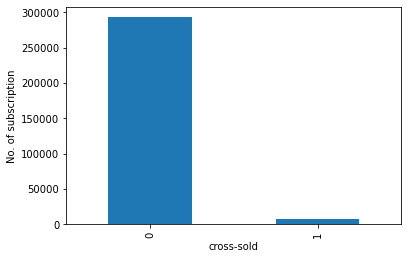

0    292996
1      7004
Name: target, dtype: int64
Cross-sold customers: 2.33 % of data
No-cross-sold customers: 97.67 % of data


In [10]:
df_train_new['target'].value_counts().plot(kind='bar')
plt.xlabel('cross-sold')
plt.ylabel('No. of subscription')
plt.show()

print(df_train_new['target'].value_counts())

print('Cross-sold customers:', round(df_train_new.target.value_counts()[1]/len(df_train_new)*100, 2), '% of data')
print('No-cross-sold customers:', round(df_train_new.target.value_counts()[0]/len(df_train_new)*100, 2), '% of data')

In [11]:
df_train_new['delinquent_90_balance_amt'].describe()

count    300000.000000
mean          0.022755
std           2.623279
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1031.810000
Name: delinquent_90_balance_amt, dtype: float64

Based on the descriptive statistic above, as the 25th percentile = 50th percentile = 75th percentile = 0 and the standard deviation is quite small (2.623), it is easy to see that more than 99% of existing customers have owed Comcast 0 dollars (great!). Let's explore the outlier customer who has owed Comcast 1031.81 USD for the last 90-140 days. 

In [12]:
df_train_deliq = df_train_new[df_train_new['delinquent_90_balance_amt']>0][['product', 'target', 'delinquent_90_balance_amt']]
print(f'Number of customers who owed money to Comcast: {df_train_deliq.shape[0]}')
print(df_train_deliq.groupby(['product', 'target']).agg({"sum", "mean", "count"}))

df_train_deliq[df_train_deliq.target==1]


Number of customers who owed money to Comcast: 65
                             delinquent_90_balance_amt                     
                                                 count      sum        mean
product               target                                               
DATA ONLY             0                             10   519.67   51.967000
DATA/VOICE            0                              1   184.48  184.480000
VIDEO ONLY            0                             18  2045.81  113.656111
VIDEO/DATA            0                             16  1590.54   99.408750
                      1                              2   324.00  162.000000
VIDEO/DATA/VOICE      0                             17  1988.82  116.989412
VIDEO/DATA/VOICE/HOME 0                              1   173.05  173.050000


,product,target,delinquent_90_balance_amt
66331,VIDEO/DATA,1,72.08
229012,VIDEO/DATA,1,251.92


Based on the above table, we can easily see that even though only 2 customers that were cross-sold owed money to Comcast, their avearge amount is the third highest (162) when segmenting customers by product-mean amount owed. However, ~97% of customers who owed money are non-target customers, with the highest average amount owed is 184.48 (DATA/VOICE service) while the lowest average amount owed is 51.967 (DATA ONLY service). Among those ~97% of customers who owed money, the top 3 in descending order used "VIDEO/ONLY" (18 customers), followed by "VIDEO/DATA/VOICE" (17 customers) and "VIDEO/DATA" (16 customers). The average amount owed in this particular group is ~110.3 USD. 

In general, for our given dataset, the analyst did a great job at avoiding cross selling almost all customers who have failed to make their payments over the last 90-145 days except the two customers with "VIDEO/DATA" products. This is one key aspect where we expect our multi-class classification model to take into account.

In [13]:
df_train_deliq_prev_data = df_train_new[(df_train_new['delinquent_90_balance_amt']>0) & (df_train_new['prev_rgu_video']==0)
                             & (df_train_new['prev_rgu_voice']==0) & 
                              (df_train_new['prev_rgu_data']==1)]['product']
df_train_deliq_prev_voice = df_train_new[(df_train_new['delinquent_90_balance_amt']>0) & (df_train_new['prev_rgu_video']==0)
                             & (df_train_new['prev_rgu_voice']==1) & 
                              (df_train_new['prev_rgu_data']==0)]['product']
df_train_deliq_prev_video = df_train_new[(df_train_new['delinquent_90_balance_amt']>0) & (df_train_new['prev_rgu_video']==1)
                             & (df_train_new['prev_rgu_voice']==0) & 
                              (df_train_new['prev_rgu_data']==0)]['product']
df_train_deliq_prev_home = df_train_new[(df_train_new['delinquent_90_balance_amt']>0) & (df_train_new['prev_rgu_video']==0)
                             & (df_train_new['prev_rgu_voice']==0) & 
                              (df_train_new['prev_rgu_data']==0) & 
                                (df_train_new['prev_number_of_products']==1)]['product']
df_train_deliq_prev_data_voice = df_train_new[(df_train_new['delinquent_90_balance_amt']>0) & (df_train_new['prev_rgu_video']==0)
                             & (df_train_new['prev_rgu_voice']==1) & 
                              (df_train_new['prev_rgu_data']==1)]['product']
df_train_deliq_prev_data_video = df_train_new[(df_train_new['delinquent_90_balance_amt']>0) & (df_train_new['prev_rgu_video']==1)
                             & (df_train_new['prev_rgu_voice']==0) & 
                              (df_train_new['prev_rgu_data']==1)]['product']
df_train_deliq_prev_video_voice = df_train_new[(df_train_new['delinquent_90_balance_amt']>0) & (df_train_new['prev_rgu_video']==1)
                             & (df_train_new['prev_rgu_voice']==1) & 
                              (df_train_new['prev_rgu_data']==0)]['product']
df_train_deliq_prev_data_video_voice = df_train_new[(df_train_new['delinquent_90_balance_amt']>0) & (df_train_new['prev_rgu_video']==1)
                             & (df_train_new['prev_rgu_voice']==1) & 
                               (df_train_new['prev_rgu_data']==1) & 
                               (df_train_new['prev_number_of_products']==3)]['product']
df_train_deliq_prev_data_video_home = df_train_new[(df_train_new['delinquent_90_balance_amt']>0) & (df_train_new['prev_rgu_video']==1)
                             & (df_train_new['prev_rgu_voice']==0) & (df_train_new['prev_rgu_data']==1) & 
                                (df_train_new['prev_number_of_products']==3)]['product']
df_train_deliq_prev_video_voice_home = df_train_new[(df_train_new['delinquent_90_balance_amt']>0) & (df_train_new['prev_rgu_video']==1)
                             & (df_train_new['prev_rgu_voice']==1) & (df_train_new['prev_rgu_data']==0) & 
                                (df_train_new['prev_number_of_products']==3)]['product']
df_train_deliq_prev_data_voice_home = df_train_new[(df_train_new['delinquent_90_balance_amt']>0) & (df_train_new['prev_rgu_video']==0)
                             & (df_train_new['prev_rgu_voice']==1) & (df_train_new['prev_rgu_data']==1) & 
                                (df_train_new['prev_number_of_products']==3)]['product']
df_train_deliq_prev_data_home = df_train_new[(df_train_new['delinquent_90_balance_amt']>0) & (df_train_new['prev_rgu_video']==0)
                             & (df_train_new['prev_rgu_voice']==0) & 
                              (df_train_new['prev_rgu_data']==1) & 
                                (df_train_new['prev_number_of_products']==2)]['product']
df_train_deliq_prev_video_home = df_train_new[(df_train_new['delinquent_90_balance_amt']>0) & (df_train_new['prev_rgu_video']==1)
                             & (df_train_new['prev_rgu_voice']==0) & 
                              (df_train_new['prev_rgu_data']==0) & 
                                (df_train_new['prev_number_of_products']==2)]['product']
df_train_deliq_prev_voice_home = df_train_new[(df_train_new['delinquent_90_balance_amt']>0) & (df_train_new['prev_rgu_video']==0)
                             & (df_train_new['prev_rgu_voice']==1) & 
                              (df_train_new['prev_rgu_data']==0) & 
                                (df_train_new['prev_number_of_products']==2)]['product']
df_train_deliq_prev_data_video_voice_home = df_train_new[(df_train_new['delinquent_90_balance_amt']>0) & 
                                                (df_train_new['prev_number_of_products']==4)]['product']

print('Product currently used by customers who owed money for the last 90-145 days with DATA ONLY in previous month \n', 
      df_train_deliq_prev_data.value_counts())
print('Product currently used by customers who owed money for the last 90-145 days with VOICE ONLY in previous month', '\n', 
      df_train_deliq_prev_voice.value_counts())
print('Product currently used by customers who owed money for the last 90-145 days with VIDEO ONLY in previous month', '\n', 
      df_train_deliq_prev_video.value_counts())
print('Product currently used by customers who owed money for the last 90-145 days with HOME ONLY in previous month', '\n', 
      df_train_deliq_prev_home.value_counts())
print('Product currently used by customers who owed money for the last 90-145 days with DATA/VOICE in previous month', '\n', 
      df_train_deliq_prev_data_voice.value_counts())
print('Product currently used by customers who owed money for the last 90-145 days with DATA/VIDEO in previous month', '\n', 
      df_train_deliq_prev_data_voice.value_counts())
print('Product currently used by customers who owed money for the last 90-145 days with DATA/HOME in previous month', '\n', 
      df_train_deliq_prev_data_home.value_counts())
print('Product currently used by customers who owed money for the last 90-145 days with VIDEO/VOICE in previous month', '\n', 
      df_train_deliq_prev_video_voice.value_counts())
print('Product currently used by customers who owed money for the last 90-145 days with VIDEO/DATA/VOICE in previous month', '\n', 
      df_train_deliq_prev_data_video_voice.value_counts())
print('Product currently used by customers who owed money for the last 90-145 days with VIDEO/HOME in previous month', '\n', 
      df_train_deliq_prev_video_home.value_counts())
print('Product currently used by customers who owed money for the last 90-145 days with VOICE/HOME in previous month', '\n', 
      df_train_deliq_prev_voice_home.value_counts())
print('Product currently used by customers who owed money for the last 90-145 days with DATA/VIDEO/HOME in previous month', '\n', 
      df_train_deliq_prev_data_video_home.value_counts())
print('Product currently used by customers who owed money for the last 90-145 days with VIDEO/VOICE/HOME in previous month', '\n', 
      df_train_deliq_prev_video_voice_home.value_counts())
print('Product currently used by customers who owed money for the last 90-145 days with DATA/VOICE/HOME in previous month', '\n', 
      df_train_deliq_prev_data_voice_home.value_counts())
print('Product currently used by customers who owed money for the last 90-145 days with DATA/VIDEO/VOICE/HOME in previous month', '\n', 
      df_train_deliq_prev_data_video_voice_home.value_counts())



Product currently used by customers who owed money for the last 90-145 days with DATA ONLY in previous month 
 DATA ONLY    10
Name: product, dtype: int64
Product currently used by customers who owed money for the last 90-145 days with VOICE ONLY in previous month 
 Series([], Name: product, dtype: int64)
Product currently used by customers who owed money for the last 90-145 days with VIDEO ONLY in previous month 
 VIDEO ONLY    18
Name: product, dtype: int64
Product currently used by customers who owed money for the last 90-145 days with HOME ONLY in previous month 
 Series([], Name: product, dtype: int64)
Product currently used by customers who owed money for the last 90-145 days with DATA/VOICE in previous month 
 DATA/VOICE    1
Name: product, dtype: int64
Product currently used by customers who owed money for the last 90-145 days with DATA/VIDEO in previous month 
 DATA/VOICE    1
Name: product, dtype: int64
Product currently used by customers who owed money for the last 90-145 da

Based on the table above, the majority of customers who owed money to COMCAST for the last 90-145 days all have VIDEO or DATA as part of their product. The top 3 product categories with the most number of customers' delinquencies are "VIDEO ONLY", "VIDEO/DATA/VOICE" and "DATA ONLY". Thus the analyst should avoid targeting customers who have these 3 products in the previous month and have existing delinquencies, even when targeting "VIDEO ONLY" or "DATA ONLY" customers with cross sell is a recommended move based on our sample dataset (see below for further details). 

In [37]:
df_train_premium = df_train_new[['product', 'target', 'PREMIUM']]
print(df_train_premium.groupby(['product', 'target']).agg({"count", "sum"}))

                             PREMIUM       
                               count    sum
product               target               
DATA ONLY             0        43833     13
                      1         2313      0
DATA/HOME             0          299      1
                      1            9      0
DATA/VOICE            0        10202      6
                      1          246      0
DATA/VOICE/HOME       0          104      1
                      1            9      0
HOME ONLY             0           69      0
                      1            6      0
VIDEO ONLY            0        39837   6085
                      1         1213    300
VIDEO/DATA            0        80226  51002
                      1         2532   1700
VIDEO/DATA/HOME       0         3122   2302
                      1           45     38
VIDEO/DATA/VOICE      0       106781  72516
                      1          434    371
VIDEO/DATA/VOICE/HOME 0         4992   4272
VIDEO/HOME            0         

Based on the table above, we note that all the customers that were cross sold and had PREMIUM channel subscribers all had VIDEO as a component of their upgrades. Among all those cross sold customers, the upgrade that has the highest percentage of subscribers with PREMIUM channel are VIDEO/DATA/VOICE (371/434 ~ 85.484%) followed by VIDEO/DATA/HOME (38/45 ~ 84.44%) and VIDEO/DATA (1700/2532 ~ 67.14%). It is unlikely to upsell cross sold subscribers with VIDEO ONLY service successfully with PREMIUM channel (only 24.73% of 1213 cross-sold subscribers with VIDEO ONLY service had PREMIUM channels). Finally, as the sample sizes of cross sold customers with VIDEO/VOICE/HOME and VIDEO/HOME service are too small, we cannot make any meaningful inference.

It is important to note that we would not upsell customers that were cross sold with services not including VIDEO as part of their product, because the success rate of such strategy, based on the above table, is 0% (i.e, look at all the rows with "target = 1" and product that does not contain VIDEO). It intuitively makes sense, because VIDEO-related service offered by media company like COMCAST tends to associates with TV channels which tend to be segmented as "BASIC/ PREMIUM" channel.

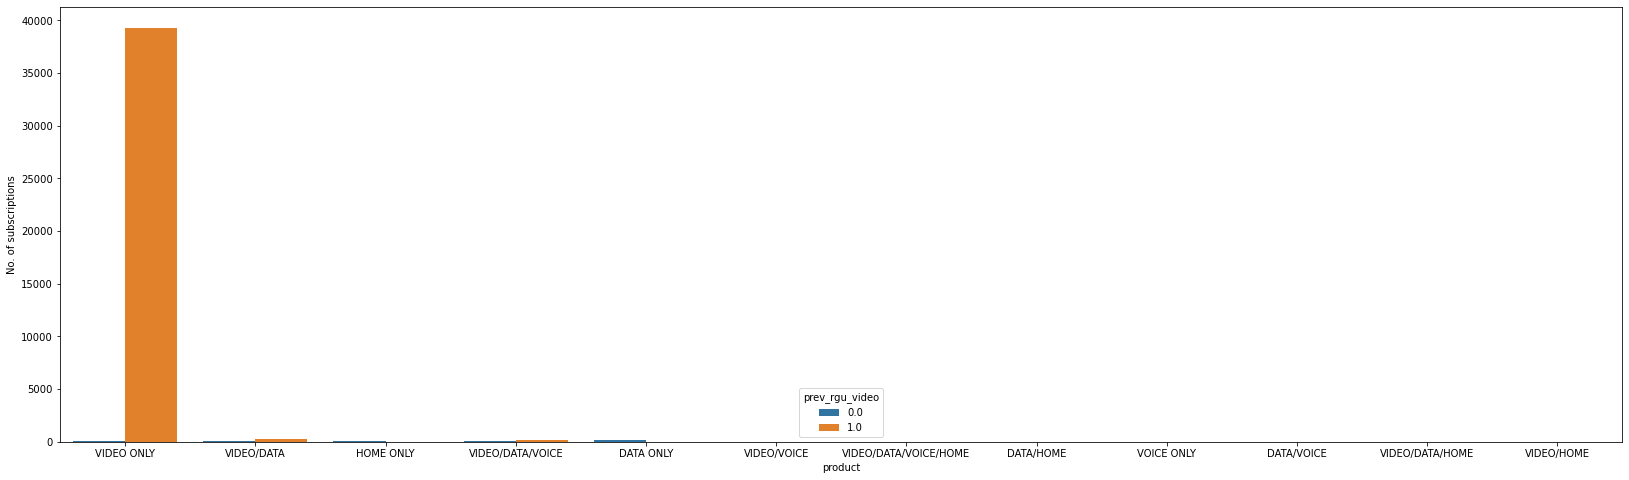

In [15]:
plt.figure(figsize=(28,8))
sns.countplot(data=df_train_new[(df_train_new.target==0) & (df_train_new.prev_rgu_voice==0) & 
                                (df_train_new.prev_rgu_data==0)], x='product',hue='prev_rgu_video')
plt.ylabel('No. of subscriptions')
plt.show()

Based on the bar chart above, we see that among all non-target customers, if they already used "VIDEO ONLY" but not VOICE or Data-related service in the previous month, they most often just stick with the same service in the current month (these customers are actually those our analysts need to try cross-selling, and there are almost 40,000 of them from the chart). Furthermore, a very small number of customers in the set of non-target customers who already had "VIDEO" but not "VOICE/DATA" service in their previous month, would actually upgrade to "VIDEO/DATA" and "VIDEO/DATA/VOICE." (these customers do not need our analysts to cross sell them).

Most interestingly, a few non-target customers who did not have any "VIDEO, DATA, VOICE" service in the previous month would opt for "DATA ONLY" plan (these customers also do not need our analyts to cross sell them).

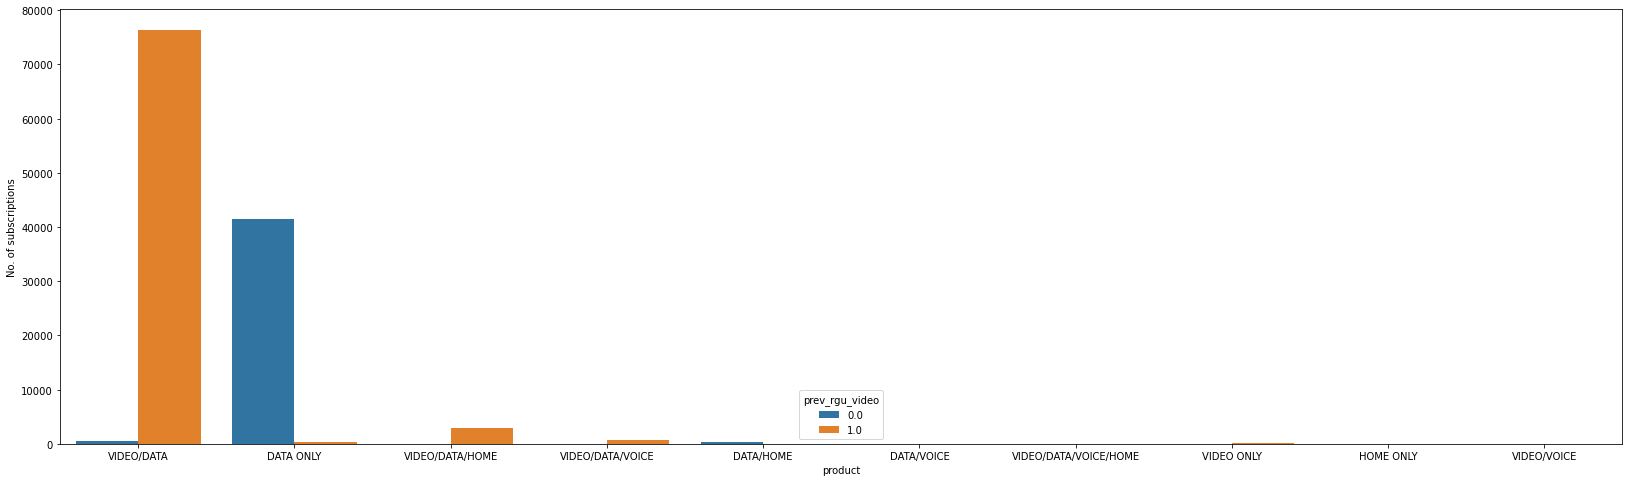

In [16]:
plt.figure(figsize=(28,8))
sns.countplot(data=df_train_new[(df_train_new.target==0) & (df_train_new.prev_rgu_voice==0) & 
                                (df_train_new.prev_rgu_data==1)], x='product',hue='prev_rgu_video')
plt.ylabel('No. of subscriptions')
plt.show()

Similar analysis as above for non-target customers who already used VIDEO and DATA-related service in previous month indicates that the majority of them once again sticks with "VIDEO/DATA" service (analyst should spend time cross selling these customers), while a handful upgraded to VIDEO/DATA/HOME and a smaller number upgraded to VIDEO/DATA/VOICE (analyst should avoid targetting  customers). 

Finally, for customers that did not use VIDEO or VOICE-related service in the previous month but did use DATA-related service, the majority sticks with "DATA ONLY" service (analyst should spend time cross selling these customers) while very few upgraded to DATA/HOME service (these later customers don't need to be targetted by our analysts).   

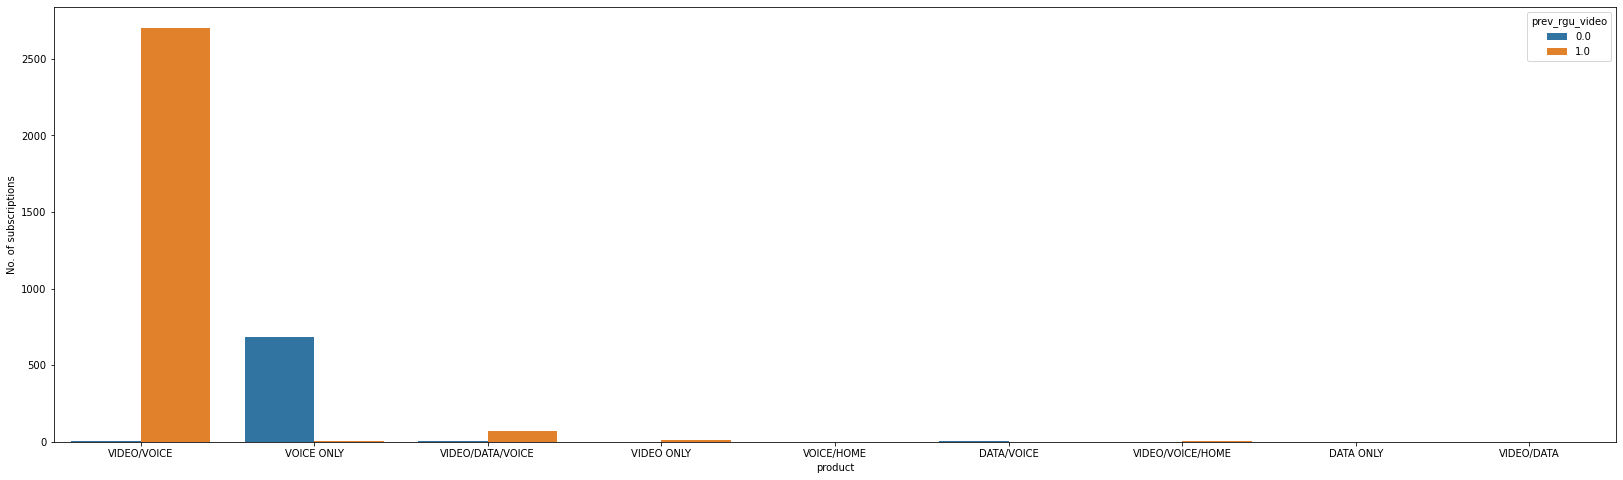

In [17]:
plt.figure(figsize=(28,8))
sns.countplot(data=df_train_new[(df_train_new.target==0) & (df_train_new.prev_rgu_voice==1) & 
                                (df_train_new.prev_rgu_data==0)], x='product',hue='prev_rgu_video')
plt.ylabel('No. of subscriptions')
plt.show()

Similar analysis as above for non-target customers who already used VIDEO and VOICE-related product in previous month indicates that the majority of them once again sticks with "VIDEO/VOICE" product (analyst should spend time cross selling these customers), while a handful has "VIDEO/DATA/VOICE" product (analyst should avoid targeting all such customers, since they would upgrade anyways, IF it is expensive and/or time-consuming to cross sell a customer). 

Finally, for customers that did not use VIDEO or DATA-related product in the previous month but did use VOICE-related product, the majority sticks with "VOICE ONLY" product. Interestingly, unlike in the previous cases, none of such customers ended up using VOICE combined with (other) products (these customers are solid cross selling opportunities for analysts).

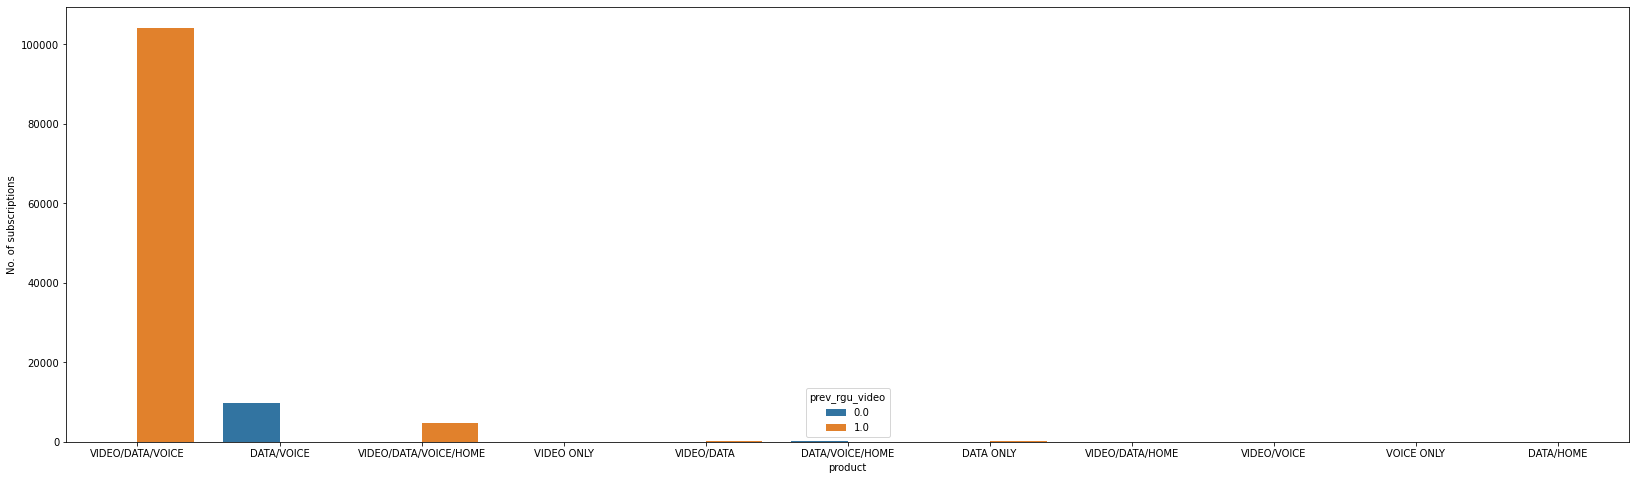

In [18]:
plt.figure(figsize=(28,8))
sns.countplot(data=df_train_new[(df_train_new.target==0) & (df_train_new.prev_rgu_voice==1) & 
                                (df_train_new.prev_rgu_data==1)], x='product',hue='prev_rgu_video')
plt.ylabel('No. of subscriptions')
plt.show()

Similar analysis as above for non-target customers who already used VIDEO/DATA/VOICE-related product in previous month indicates that the majority of them once again sticks with the same product (analyst should target these customers for cross sell HOME product), while a handful has "VIDEO/DATA/VOICE/HOME" product (analyst should avoid targeting all such customers, since they would upgrade anyways, IF it is expensive and/or time-consuming to cross sell a customer). 

Finally, for customers that did not use VIDEO or DATA-related product in the previous month but did use VOICE-related product, the majority sticks with "VOICE ONLY" product. Interestingly, unlike in the previous cases, none of such customers ended up using VOICE combined with (other) products (these customers are solid cross selling opportunities for analysts).

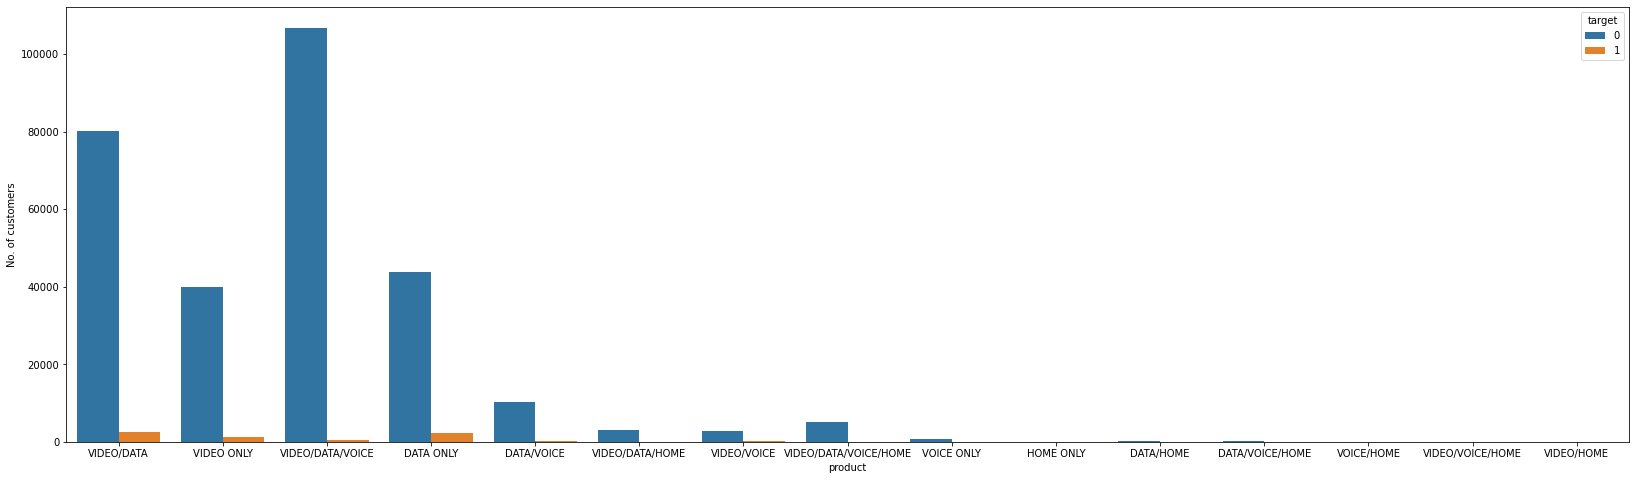

In [19]:
plt.figure(figsize=(28,8))
sns.countplot(data=df_train_new,x='product',hue='target')
plt.ylabel('No. of customers')
plt.show()

Based on the chart above, the most number of cross-sold customers have "VIDEO/DATA" product followed by "DATA ONLY" and "VIDEO ONLY" product. Obviously, our sample dataset is highly imbalanced in terms of target/non-target even segmented by products, as there are a lot of other products without having any cross-sold customers (e.g. DATA/VOICE, VIDEO/DATA/HOME).

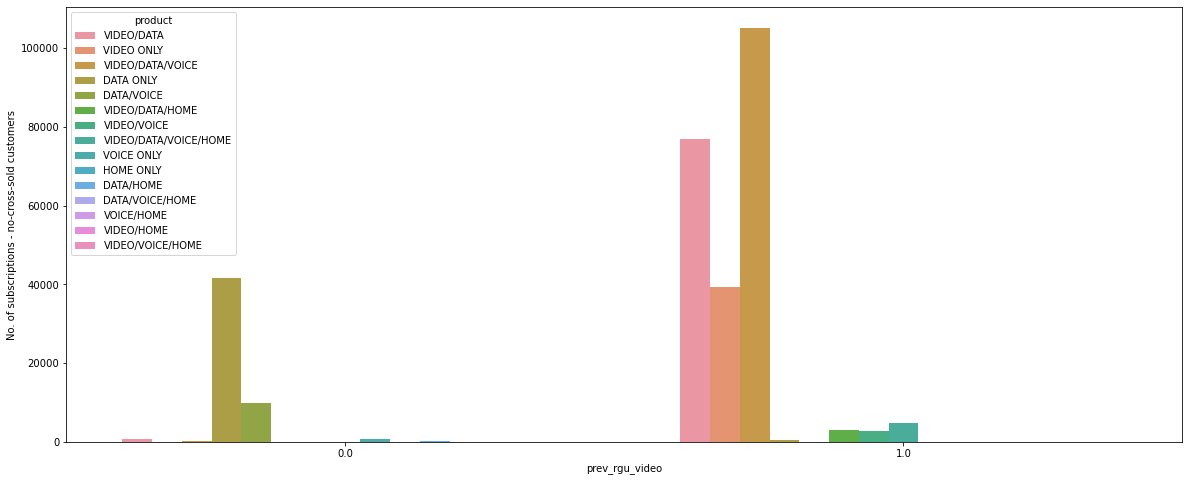

In [20]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_train_new[df_train_new.target==0],x='prev_rgu_video',hue='product')
plt.ylabel('No. of subscriptions - no-cross-sold customers')
plt.show()

Based on the chart above, we see that with consumers who have no VIDEO-related product in the previous month, a majority of them has "DATA ONLY" service, followed by "DATA/VOICE" service. With consumers who have VIDEO-related product in the previous month, they all have products that contain "VIDEO" as their components. The top four products are "VIDEO/DATA/VOICE", "VIDEO/DATA", "VIDEO ONLY" and "VIDEO/DATA/VOICE/HOME." Only a small number of consumers has "VIDEO/DATA/HOME" and "VIDEO/VOICE" services. Interestingly, they rarely switch to a completely new product that does not include "VIDEO."

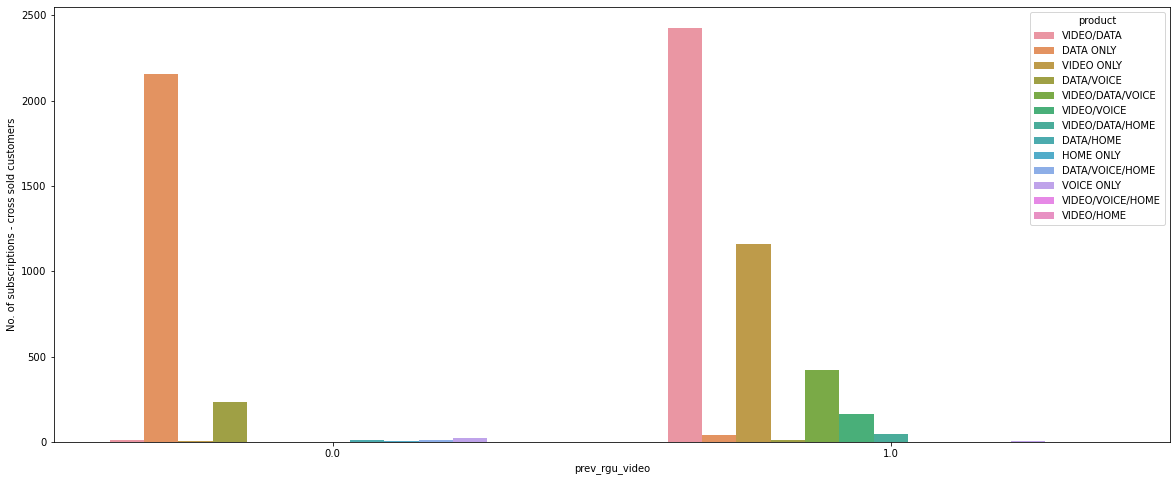

In [21]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_train_new[df_train_new.target==1],x='prev_rgu_video',hue='product')
plt.ylabel('No. of subscriptions - cross sold customers')
plt.show()

Frequency of each product offered to new, no-premium, non-target subscribers: 
 DATA ONLY                132
HOME ONLY                 63
VIDEO/DATA                45
VIDEO ONLY                38
VIDEO/DATA/VOICE          25
DATA/VOICE                10
VIDEO/VOICE                2
VIDEO/DATA/HOME            2
DATA/HOME                  1
VIDEO/DATA/VOICE/HOME      1
VOICE ONLY                 1
Name: product, dtype: int64
Number of new, no-premium, non-target subscribers:  320
New, non-target subscribers with "DATA ONLY" product: 132
New, non-target subscribers with "VIDEO ONLY" product: 44
New, non-target subscribers with "VOICE ONLY" product: 1
New, non-target subscribers with "HOME ONLY" product: 63
New, non-target subscribers with "VIDEO/DATA" product: 103
New, non-target subscribers with "VIDEO/DATA/VOICE" product: 60
New, non-target subscribers with "DATA/VOICE" product: 10
New, non-target subscribers with "DATA ONLY" premium product:  0
New, non-target subscribers with "DATA ON

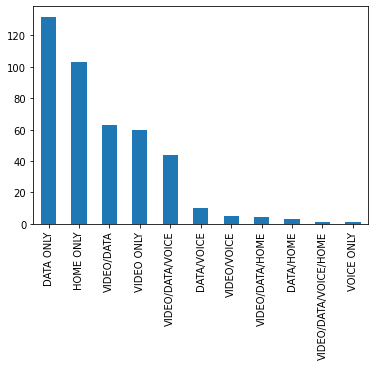

In [22]:
df_train_new[(df_train_new['target']==0) & (df_train_new['prev_rgu_data']==0) & 
             (df_train_new['prev_rgu_video']==0) & 
             (df_train_new['prev_rgu_voice']==0)]['product'].value_counts().plot(kind='bar')

df_train_new[(df_train_new['target']==0) & (df_train_new['prev_rgu_data']==0) & 
             (df_train_new['prev_rgu_video']==0) & 
             (df_train_new['prev_rgu_voice']==0) & 
             (df_train_new['PREMIUM']==1)]['product'].value_counts().plot(kind='bar')

df_train_new[(df_train_new['target']==0) & (df_train_new['prev_rgu_data']==0) & 
             (df_train_new['prev_rgu_video']==0) & 
             (df_train_new['prev_rgu_voice']==0) & 
             (df_train_new['PREMIUM']==0)]['product'].value_counts().plot(kind='bar')

print('Frequency of each product offered to new, no-premium, non-target subscribers: \n', 
      df_train_new[(df_train_new['target']==0) & (df_train_new['prev_rgu_data']==0) & 
                   (df_train_new['prev_rgu_video']==0) & 
                   (df_train_new['prev_rgu_voice']==0) & 
                   (df_train_new['PREMIUM']==0)]['product'].value_counts())

newsub_nopremium = df_train_new[(df_train_new['target']==0) & (df_train_new['prev_rgu_data']==0) & 
                                (df_train_new['prev_rgu_video']==0) & 
                                (df_train_new['prev_rgu_voice']==0) & 
                                (df_train_new['PREMIUM']==0)].shape[0]
print('Number of new, no-premium, non-target subscribers: ', newsub_nopremium)

data_only_newsub = df_train_new[(df_train_new['product'] == 'DATA ONLY') & (df_train_new['target']==0) & 
                        (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                        (df_train_new['prev_rgu_voice']==0)].shape[0]
video_only_newsub = df_train_new[(df_train_new['product'] == 'VIDEO ONLY') & (df_train_new['target']==0) & 
                                 (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                 (df_train_new['prev_rgu_voice']==0)].shape[0]
voice_only_newsub = df_train_new[(df_train_new['product'] == 'VOICE ONLY') & (df_train_new['target']==0) & 
                                 (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                 (df_train_new['prev_rgu_voice']==0)].shape[0]
home_only_newsub = df_train_new[(df_train_new['product'] == 'HOME ONLY') & (df_train_new['target']==0) & 
                                (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                (df_train_new['prev_rgu_voice']==0)].shape[0]
video_data_only_newsub = df_train_new[(df_train_new['product'] == 'VIDEO/DATA') & (df_train_new['target']==0) & 
                                      (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                      (df_train_new['prev_rgu_voice']==0)].shape[0]
video_data_voice_only_newsub = df_train_new[(df_train_new['product'] == 'VIDEO/DATA/VOICE') & (df_train_new['target']==0) & 
                                      (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                      (df_train_new['prev_rgu_voice']==0)].shape[0]
data_voice_only_newsub = df_train_new[(df_train_new['product'] == 'DATA/VOICE') & (df_train_new['target']==0) & 
                                      (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                      (df_train_new['prev_rgu_voice']==0)].shape[0]
data_voice_only_newsub = df_train_new[(df_train_new['product'] == 'DATA/VOICE') & (df_train_new['target']==0) & 
                                      (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                      (df_train_new['prev_rgu_voice']==0)].shape[0]

print(f'New, non-target subscribers with "DATA ONLY" product: {data_only_newsub}')
print(f'New, non-target subscribers with "VIDEO ONLY" product: {video_only_newsub}')
print(f'New, non-target subscribers with "VOICE ONLY" product: {voice_only_newsub}')
print(f'New, non-target subscribers with "HOME ONLY" product: {home_only_newsub}')
print(f'New, non-target subscribers with "VIDEO/DATA" product: {video_data_only_newsub}')
print(f'New, non-target subscribers with "VIDEO/DATA/VOICE" product: {video_data_voice_only_newsub}')
print(f'New, non-target subscribers with "DATA/VOICE" product: {data_voice_only_newsub}')

data_only_newsub_withprem = df_train_new[(df_train_new['product'] == 'DATA ONLY') & (df_train_new['target']==0) & 
                                       (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                       (df_train_new['prev_rgu_voice']==0) & (df_train_new['PREMIUM']==1)].shape[0]

data_only_newsub_noprem = df_train_new[(df_train_new['product'] == 'DATA ONLY') & (df_train_new['target']==0) & 
                                       (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                       (df_train_new['prev_rgu_voice']==0) & (df_train_new['PREMIUM']==0)].shape[0]
print('New, non-target subscribers with "DATA ONLY" premium product: ', data_only_newsub_withprem)
print('New, non-target subscribers with "DATA ONLY" no-premium product: ', data_only_newsub_noprem)

video_only_newsub_withprem = df_train_new[(df_train_new['product'] == 'VIDEO ONLY') & (df_train_new['target']==0) & 
                                       (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                       (df_train_new['prev_rgu_voice']==0) & (df_train_new['PREMIUM']==1)].shape[0]
video_only_newsub_noprem = df_train_new[(df_train_new['product'] == 'VIDEO ONLY') & (df_train_new['target']==0) & 
                                       (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                       (df_train_new['prev_rgu_voice']==0) & (df_train_new['PREMIUM']==0)].shape[0]
print('New, non-target subscribers with "VIDEO ONLY" premium product: ', video_only_newsub_withprem)
print('New, non-target subscribers with "VIDEO ONLY" no-premium product: ', video_only_newsub_noprem)

voice_only_newsub_withprem = df_train_new[(df_train_new['product'] == 'VOICE ONLY') & (df_train_new['target']==0) & 
                                       (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                       (df_train_new['prev_rgu_voice']==0) & (df_train_new['PREMIUM']==1)].shape[0]
voice_only_newsub_noprem = df_train_new[(df_train_new['product'] == 'VOICE ONLY') & (df_train_new['target']==0) & 
                                       (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                       (df_train_new['prev_rgu_voice']==0) & (df_train_new['PREMIUM']==0)].shape[0]
print(f'New, non-target subscribers with "VOICE ONLY" premium product: {voice_only_newsub_withprem}')
print(f'New, non-target subscribers with "VOICE ONLY" no-premium product: {voice_only_newsub_noprem}')

home_only_newsub_withprem = df_train_new[(df_train_new['product'] == 'HOME ONLY') & (df_train_new['target']==0) & 
                                       (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                       (df_train_new['prev_rgu_voice']==0) & (df_train_new['PREMIUM']==1)].shape[0]
home_only_newsub_noprem = df_train_new[(df_train_new['product'] == 'HOME ONLY') & (df_train_new['target']==0) & 
                                       (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                       (df_train_new['prev_rgu_voice']==0) & (df_train_new['PREMIUM']==0)].shape[0]
print(f'New, non-target subscribers with "HOME ONLY" premium product: {home_only_newsub_withprem}')
print(f'New, non-target subscribers with "HOME ONLY" no-premium product: {home_only_newsub_noprem}')

data_voice_only_newsub_withprem = df_train_new[(df_train_new['product'] == 'DATA/VOICE') & 
                                               (df_train_new['target']==0) & (df_train_new['prev_rgu_data']==0) & 
                                               (df_train_new['prev_rgu_video']==0) & (df_train_new['prev_rgu_voice']==0) & 
                                               (df_train_new['PREMIUM']==1)].shape[0]
data_voice_only_newsub_noprem = df_train_new[(df_train_new['product'] == 'DATA/VOICE') & (df_train_new['target']==0) & 
                                             (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                             (df_train_new['prev_rgu_voice']==0) & (df_train_new['PREMIUM']==0)].shape[0]
print(f'New, non-target subscribers with "DATA/VOICE" premium product: {data_voice_only_newsub_withprem}')
print(f'New, non-target subscribers with "DATA/VOICE" no-premium product: {data_voice_only_newsub_noprem}')

video_data_only_newsub_withprem = df_train_new[(df_train_new['product'] == 'VIDEO/DATA') & (df_train_new['target']==0) & 
                                               (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                               (df_train_new['prev_rgu_voice']==0) & 
                                               (df_train_new['PREMIUM']==1)].shape[0]
video_data_only_newsub_noprem = df_train_new[(df_train_new['product'] == 'VIDEO/DATA') & (df_train_new['target']==0) & 
                                             (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                             (df_train_new['prev_rgu_voice']==0) & 
                                             (df_train_new['PREMIUM']==0)].shape[0]
print(f'New, non-target subscribers with "VIDEO/DATA" premium product: {video_data_only_newsub_withprem}')
print(f'New, non-target subscribers with "VIDEO/DATA" no-premium product: {video_data_only_newsub_noprem}')

data_home_only_newsub_withprem = df_train_new[(df_train_new['product'] == 'DATA/HOME') & 
                                               (df_train_new['target']==0) & (df_train_new['prev_rgu_data']==0) & 
                                               (df_train_new['prev_rgu_video']==0) & (df_train_new['prev_rgu_voice']==0) & 
                                               (df_train_new['PREMIUM']==1)].shape[0]
data_home_only_newsub_noprem = df_train_new[(df_train_new['product'] == 'DATA/HOME') & (df_train_new['target']==0) & 
                                             (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                             (df_train_new['prev_rgu_voice']==0) & (df_train_new['PREMIUM']==0)].shape[0]
print(f'New, non-target subscribers with "DATA/HOME" premium product: {data_home_only_newsub_withprem}')
print(f'New, non-target subscribers with "DATA/HOME" no-premium product: {data_home_only_newsub_noprem}')

home_voice_only_newsub_withprem = df_train_new[(df_train_new['product'] == 'HOME/VOICE') & 
                                               (df_train_new['target']==0) & (df_train_new['prev_rgu_data']==0) & 
                                               (df_train_new['prev_rgu_video']==0) & (df_train_new['prev_rgu_voice']==0) & 
                                               (df_train_new['PREMIUM']==1)].shape[0]
home_voice_only_newsub_noprem = df_train_new[(df_train_new['product'] == 'HOME/VOICE') & (df_train_new['target']==0) & 
                                             (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                             (df_train_new['prev_rgu_voice']==0) & (df_train_new['PREMIUM']==0)].shape[0]
print(f'New, non-target subscribers with "HOME/VOICE" premium product: {home_voice_only_newsub_withprem}')
print(f'New, non-target subscribers with "HOME/VOICE" no-premium product: {home_voice_only_newsub_noprem}')

home_video_only_newsub_withprem = df_train_new[(df_train_new['product'] == 'VIDEO/HOME') & 
                                               (df_train_new['target']==0) & (df_train_new['prev_rgu_data']==0) & 
                                               (df_train_new['prev_rgu_video']==0) & (df_train_new['prev_rgu_voice']==0) & 
                                               (df_train_new['PREMIUM']==1)].shape[0]
home_video_only_newsub_noprem = df_train_new[(df_train_new['product'] == 'VIDEO/HOME') & 
                                             (df_train_new['target']==0) & 
                                             (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                             (df_train_new['prev_rgu_voice']==0) & (df_train_new['PREMIUM']==0)].shape[0]
print(f'New, non-target subscribers with "HOME/VIDEO" premium product: {home_video_only_newsub_withprem}')
print(f'New, non-target subscribers with "HOME/VIDEO" no-premium product: {home_video_only_newsub_noprem}')

home_video_voice_only_newsub_withprem = df_train_new[(df_train_new['product'] == 'VIDEO/VOICE/HOME') & 
                                               (df_train_new['target']==0) & (df_train_new['prev_rgu_data']==0) & 
                                               (df_train_new['prev_rgu_video']==0) & (df_train_new['prev_rgu_voice']==0) & 
                                               (df_train_new['PREMIUM']==1)].shape[0]
home_video_voice_only_newsub_noprem = df_train_new[(df_train_new['product'] == 'VIDEO/VOICE/HOME') & 
                                             (df_train_new['target']==0) & 
                                             (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                             (df_train_new['prev_rgu_voice']==0) & (df_train_new['PREMIUM']==0)].shape[0]
print(f'New, non-target subscribers with "VIDEO/VOICE/HOME" premium product: {home_video_voice_only_newsub_withprem}')
print(f'New, non-target subscribers with "VIDEO/VOICE/HOME" no-premium product: {home_video_voice_only_newsub_noprem}')

home_voice_data_only_newsub_withprem = df_train_new[(df_train_new['product'] == 'DATA/VOICE/HOME') & 
                                               (df_train_new['target']==0) & (df_train_new['prev_rgu_data']==0) & 
                                               (df_train_new['prev_rgu_video']==0) & (df_train_new['prev_rgu_voice']==0) & 
                                               (df_train_new['PREMIUM']==1)].shape[0]
home_voice_data_only_newsub_noprem = df_train_new[(df_train_new['product'] == 'DATA/VOICE/HOME') & 
                                             (df_train_new['target']==0) & 
                                             (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                             (df_train_new['prev_rgu_voice']==0) & (df_train_new['PREMIUM']==0)].shape[0]
print(f'New, non-target subscribers with "DATA/VOICE/HOME" premium product: {home_voice_data_only_newsub_withprem}')
print(f'New, non-target subscribers with "DATA/VOICE/HOME" no-premium product: {home_voice_data_only_newsub_noprem}')

voice_video_data_only_newsub_withprem = df_train_new[(df_train_new['product'] == 'VIDEO/DATA/VOICE') & 
                                               (df_train_new['target']==0) & (df_train_new['prev_rgu_data']==0) & 
                                               (df_train_new['prev_rgu_video']==0) & (df_train_new['prev_rgu_voice']==0) & 
                                               (df_train_new['PREMIUM']==1)].shape[0]
voice_video_data_only_newsub_noprem = df_train_new[(df_train_new['product'] == 'VIDEO/DATA/VOICE') & 
                                             (df_train_new['target']==0) & 
                                             (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                             (df_train_new['prev_rgu_voice']==0) & (df_train_new['PREMIUM']==0)].shape[0]
print(f'New, non-target subscribers with "VIDEO/DATA/VOICE" premium product: {voice_video_data_only_newsub_withprem}')
print(f'New, non-target subscribers with "VIDEO/DATA/VOICE" no-premium product: {voice_video_data_only_newsub_noprem}')


video_data_home_only_newsub_withprem = df_train_new[(df_train_new['product'] == 'VIDEO/DATA/HOME') & 
                                                     (df_train_new['target']==0) & (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                               (df_train_new['prev_rgu_voice']==0) & (df_train_new['PREMIUM']==1)].shape[0]

video_data_home_only_newsub_noprem = df_train_new[(df_train_new['product'] == 'VIDEO/DATA/HOME') & (df_train_new['target']==0) & 
                                                   (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                                   (df_train_new['prev_rgu_voice']==0) & (df_train_new['PREMIUM']==0)].shape[0]
print(f'New, non-target subscribers with "VIDEO/DATA/HOME" premium product: {video_data_home_only_newsub_withprem}')
print(f'New, non-target subscribers with "VIDEO/DATA/HOME" no-premium product: {video_data_home_only_newsub_noprem}')

video_data_home_voice_only_newsub_withprem = df_train_new[(df_train_new['product'] == 'VIDEO/DATA/VOICE/HOME') & 
                                                     (df_train_new['target']==0) & (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                               (df_train_new['prev_rgu_voice']==0) & (df_train_new['PREMIUM']==1)].shape[0]

video_data_home_voice_only_newsub_noprem = df_train_new[(df_train_new['product'] == 'VIDEO/DATA/VOICE/HOME') & (df_train_new['target']==0) & 
                                                   (df_train_new['prev_rgu_data']==0) & (df_train_new['prev_rgu_video']==0) & 
                                                   (df_train_new['prev_rgu_voice']==0) & (df_train_new['PREMIUM']==0)].shape[0]
print(f'New, non-target subscribers with "VIDEO/DATA/VOICE/HOME" premium product: {video_data_home_voice_only_newsub_withprem}')
print(f'New, non-target subscribers with "VIDEO/DATA/VOICE/HOME" no-premium product: {video_data_home_voice_only_newsub_noprem}')





From the above EDA, we see that for new, non-targeted and non-premium subscribers (defined as those who did not use any DATA, VOICE/VIDEO service in the previous month), the top 6 categories in a **decreasing** order is "DATA ONLY" (132/320 ~ 41.25%), "HOME ONLY" (63/320 ~ 19.69%), "VIDEO/DATA" (14.06%), "VIDEO ONLY" (11.88%), "VIDEO/DATA/VOICE" (7.81%), "DATA/VOICE" (3.13%). In addition, among those subscribers, "VIDEO/DATA", "VIDEO/DATA/VOICE/HOME" and "VIDEO/DATA/HOME" products have more than 50% subscribers with PREMIUM versus NO-PREMIUM. All the remaining products that do not include "VIDEO" would have all NO-PREMIUM subscribers.

**EDA Insight** The analyst should target existing customers that have "VIDEO" or "DATA" as one of the component in their product in the previous month. Those customers must not have existing delinquencies with COMCAST. For "VIDEO", once the analyst can cross sell successfully with "DATA", very likely they can upsell to customers with PREMIUM channels as well. New customers who have never subscribed to COMCAST in the previous month (0 value in the column "prev_number_of_products") should also be cross-sold "VIDEO ONLY, "DATA ONLY", "VIDEO/DATA", "VIDEO/DATA/VOICE" as part of their product offerings. Avoid non-target customers in this sample that automatically upgrade their services, if the marketing expense is costly.

## Feature Selection

In [23]:
df_train_new2 = df_train_new.copy()
corr_kendall = df_train_new2.corr(method='kendall')['target'].abs().sort_values(ascending=False)
top_22_corr = corr_kendall.nlargest(22).index.tolist()
print("Top 22 correlation features with target:  \n", top_22_corr)

Top 22 correlation features with target:  
 ['target', 'prev_number_of_products', 'prev_rgu_voice', 'prev_rgu_video', 'offer_months_duration', 'svcr_issue_resolved', 'bs_tech_service_working', 'hic_macs_count', 'bllng_amt', 'tellop_ind', 'PREMIUM', 'infin_ind', 'x1_platform', 'DVD_LOVERS', 'SPIX', 'svcr_overall_sat', 'cloud_dvr', 'mrm_rec_data_amt', 'data_total_gb', 'svcr_rep_sat', 'DOG_LOVERS', 'prev_rgu_data']


In [24]:
corr_kendall['prev_rgu_data']

0.02010621356083495

First, lots of given features are categorical, and the column target are also categorical. Second, some features like "offer_months_duration" are obviously non-linear to the "target" variable. Hence, we need to apply Kendall's correlation coefficient (non-linear relationship measurement), as opposed to Pearson's correlation coefficient (linear relationship measurement). Based on the top 22 features with the highest absolute value of Kendall's correlation with the column "target", and combining this with our EDA above and the business context of oiur problem, we would definitely include these features into our classification model: 
'prev_number_of_products', 'prev_rgu_voice', 'prev_rgu_video', 'prev_rgu_data', 'offer_months_duration', 'PREMIUM, 'data_total_gb', 'bllng_amt', 'infin_ind' and 'tellop_ind'. We also include 'delinquent_90_balance_amt' as well (from the business perspective to NOT targeting certain customers who owed COMCAST money for the last 90-145 days).

The total number of features selected for our classification model is 11. The two columns 'target' and 'product' our target.

In [4]:
final_train = df_train_new2[['target', 'product', 'prev_number_of_products', 'prev_rgu_voice', 'prev_rgu_video', 'prev_rgu_data', 'offer_months_duration', 'PREMIUM', 
                            'data_total_gb', 'bllng_amt', 'infin_ind', 'tellop_ind', 'delinquent_90_balance_amt']]
final_train.describe()

,target,prev_number_of_products,prev_rgu_voice,prev_rgu_video,prev_rgu_data,offer_months_duration,PREMIUM,data_total_gb,bllng_amt,infin_ind,tellop_ind,delinquent_90_balance_amt
count,300000.000000,293048.000000,293048.000000,293048.000000,293048.000000,181554.000000,300000.000000,250624.000000,290275.000000,300000.000000,300000.000000,300000.000000
mean,0.023347,2.106457,0.423405,0.808622,0.846387,16.757367,0.463297,148.236582,131.101230,3.594213,7.509600,0.022755
std,0.151002,0.849589,0.494099,0.393387,0.360578,45.427986,0.498652,227.433364,292.680879,0.913969,3.345496,2.623279
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-101.450000,3.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000,12.000000,0.000000,21.155750,76.950000,3.000000,9.000000,0.000000
50%,0.000000,2.000000,0.000000,1.000000,1.000000,12.000000,0.000000,75.393500,125.670000,3.000000,9.000000,0.000000
75%,0.000000,3.000000,1.000000,1.000000,1.000000,24.000000,1.000000,199.042250,174.250000,5.000000,9.000000,0.000000
max,1.000000,4.000000,1.000000,1.000000,1.000000,9604.000000,1.000000,19582.957000,84831.300000,5.000000,9.000000,1031.810000


In [39]:
final_train.shape

(300000, 13)

In [5]:
# Label Encoder manually for different types of product. Note that starting from 1 
# (rather than 0) is critical, due to the required combination with column 'target' 
# downstream! 

final_train['product'] = final_train['product'].map(
    {'VIDEO/DATA': 1, 'VIDEO ONLY': 2,  'VIDEO/DATA/VOICE': 3, 
     'DATA ONLY': 4, 'DATA/VOICE': 5, 'VIDEO/DATA/HOME': 6, 
     'VIDEO/VOICE': 7, 'VIDEO/DATA/VOICE/HOME': 8, 'VOICE ONLY': 9,
     'HOME ONLY': 10, 'DATA/HOME': 11, 'DATA/VOICE/HOME': 12, 
     'VOICE/HOME': 13, 'VIDEO/VOICE/HOME': 14, 'VIDEO/HOME': 15
    })

final_train.head(6)

<ipython-input-5-82cd6fff3a32>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_train['product'] = final_train['product'].map(


,target,product,prev_number_of_products,prev_rgu_voice,prev_rgu_video,prev_rgu_data,offer_months_duration,PREMIUM,data_total_gb,bllng_amt,infin_ind,tellop_ind,delinquent_90_balance_amt
0,0,1,2.0,0.0,1.0,1.0,12.0,1,214.980,65.49,5,9,0.0
1,0,2,1.0,0.0,1.0,0.0,NaN,0,NaN,94.87,3,9,0.0
2,0,3,3.0,1.0,1.0,1.0,12.0,1,308.514,209.94,5,9,0.0
3,0,4,1.0,0.0,0.0,1.0,12.0,0,179.187,29.99,3,9,0.0
4,0,5,2.0,1.0,0.0,1.0,12.0,0,327.385,29.95,3,9,0.0
5,0,1,2.0,0.0,1.0,1.0,24.0,1,177.917,115.72,5,9,0.0


# Modeling Approach - Build the new "target" column to allow classification model to do two things at once (predict which customer to target, as well as the associated product). 

This modeling approach to take advantage of the time needed to train the classification model, as well as to simultaenously predict which customer to cross sell *AND* for which product, which makes the output really straightforward and simple to interpret.

Another modeling approach that we could try out, is to do the classification in two stages: 
(a) 1st stage. Predicting which customer to cross sell (so, binary classification model here is needed), and 
(b) 2nd stage. Using the output from the first stage (that is, the customer that we need to cross sell determined by the binary classification model), we then start building a multiclass classification model to determine which product combinations to offer for such customers. 

The reason I opted for the former model is because it "kills two birds in one stone", which means it takes less time to train the overall classification model. More notably though, is the fact that it potentially leads to **less** prediction error because in the 2-stage approach, once we make the first classification model, we suffer from some inaccuracies (unless we built a perfectly accurate classification model, which is unlikely). Now using those potentially inaccurate outputs from the 1st stage to feed into 2nd stage would multiply the classification error much more at the 2nd stage. Another point is to note that the number of target customers are very small compared to non-target in our given sample data, so the 2nd stage would have **limited** training data (roughly 30k * 0.70 = 21k sample data to train on).

In [6]:
final_train['target_product_combination'] = final_train['target']*final_train['product']
train = final_train.drop(['target', 'product'], axis=1)
print('Distribution of 14 classes in our dataset: \n', train['target_product_combination'].value_counts())

Distribution of 14 classes in our dataset: 
 0     292996
1       2532
4       2313
2       1213
3        434
5        246
7        166
6         45
9         28
12         9
11         9
10         6
14         2
15         1
Name: target_product_combination, dtype: int64


<ipython-input-6-4cf7b2086ddd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_train['target_product_combination'] = final_train['target']*final_train['product']


We are applying label encoding across two columns: "target" and "product" where we denote each of the 15 product combinations with distinct values from "0" to "14". Then we take the multiplication of the two columns to represent our business objective: "which customer to target" AND "which product". As expected, the dataset has 15 classes, where 0 class stands for not targetting a customer (so we don't really care which product to offer to them). It is highly imbalanced and skewed to the class 0 (no target) or 3 (target with "DATA ONLY" product). The full data dictionary for these 0 to 14 numbers can be found in a cell right above the current cell. 

# Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['target_product_combination'], axis=1), 
                                                    train['target_product_combination'], test_size=0.3, random_state=12345)
X_train['prev_number_of_products'].fillna(0, inplace=True)
X_train['prev_rgu_voice'].fillna(0, inplace=True)
X_train['prev_rgu_video'].fillna(0, inplace=True)
X_train['prev_rgu_data'].fillna(0, inplace=True)
X_train['offer_months_duration'].fillna(0, inplace=True)
X_train['data_total_gb'].fillna(0, inplace=True)
X_train['bllng_amt'].fillna(0, inplace=True)

X_test['prev_number_of_products'].fillna(0, inplace=True)
X_test['prev_rgu_voice'].fillna(0, inplace=True)
X_test['prev_rgu_video'].fillna(0, inplace=True)
X_test['prev_rgu_data'].fillna(0, inplace=True)
X_test['offer_months_duration'].fillna(0, inplace=True)
X_test['data_total_gb'].fillna(0, inplace=True)
X_test['bllng_amt'].fillna(0, inplace=True)

After applying random train-test split onto the reduced dataframe with 13 columns and 300,000 rows, we notice that for columns ''prev_number_of_products', 'prev_rgu_voice', 'prev_rgu_video', 'prev_rgu_data', 'offer_months_duration', 'data_total_gb', they all have some NaN values within each column. When we look at the associated rows of those "NaN" values, we noticed that they all have positive number under column "delinquent_90_balance_amt", which indicates that these customers have payments lapsed. This could be because they have not used the service much, if at all, or they are in the process of switching from Comcast to a new service provider. With that said, we do not want to target these customers as they are "high risk" clients (i.e., they are rent seekers).

For the 'bllng_amt' column, even though it contains NaN, all the rows are associated with 'prev_rgu_video'=1 and 'prev_number_of_products'=1 as well, while the column 'delinquent_90_balance_amt' contains all 0 values in those rows. So filling it out with 0 is also appropriate because it just means this customer's contract with Comcast expired at the end of the previous month. 

Hence, we think it is reasonable to fill out 0 in place of NaN values under all of these columns.

In [11]:
X_train.head(5)

,prev_number_of_products,prev_rgu_voice,prev_rgu_video,prev_rgu_data,offer_months_duration,PREMIUM,data_total_gb,bllng_amt,infin_ind,tellop_ind,delinquent_90_balance_amt
221929,2.0,0.0,1.0,1.0,12.0,0,202.391,109.58,3,9,0.0
145259,3.0,1.0,1.0,1.0,24.0,0,95.785,121.24,3,9,0.0
182515,1.0,0.0,1.0,0.0,0.0,0,0.000,23.12,3,0,0.0
291024,2.0,0.0,1.0,1.0,12.0,0,2.977,88.57,3,9,0.0
106113,2.0,0.0,1.0,1.0,12.0,1,68.315,136.23,5,9,0.0


In [12]:
X_test.head(5)

,prev_number_of_products,prev_rgu_voice,prev_rgu_video,prev_rgu_data,offer_months_duration,PREMIUM,data_total_gb,bllng_amt,infin_ind,tellop_ind,delinquent_90_balance_amt
162081,2.0,0.0,1.0,1.0,0.0,0,0.487,144.70,3,9,0.0
99210,1.0,0.0,0.0,1.0,12.0,0,455.858,49.99,3,9,0.0
12892,3.0,1.0,1.0,1.0,12.0,1,100.511,146.67,5,9,0.0
5649,1.0,0.0,1.0,0.0,12.0,0,0.000,108.98,3,0,0.0
240775,2.0,0.0,1.0,1.0,12.0,1,80.931,65.44,3,9,0.0


In [13]:
y_train.value_counts()

0     205113
1       1798
4       1612
2        819
3        293
5        174
7        116
6         35
9         23
11         7
12         5
10         4
14         1
Name: target_product_combination, dtype: int64

In [14]:
y_test.value_counts()

0     87883
1       734
4       701
2       394
3       141
5        72
7        50
6        10
9         5
12        4
11        2
10        2
15        1
14        1
Name: target_product_combination, dtype: int64

# Imbalanced Data Treament - Oversampling the minority class. 

As our training dataset is highly imbalanced, we would apply the well-known Oversampling technique on our training dataset to fix this problem. Moreover, in order to avoid data leakage issue, we only apply oversampling on our training dataset while keeping our testing dataset the same. 

In [8]:
Xytrain = pd.concat([X_train,y_train],axis=1)

print('before oversampling: ','\n', Xytrain['target_product_combination'].value_counts())
y_train0 = Xytrain[Xytrain['target_product_combination']==0]
y_train1 = Xytrain[Xytrain['target_product_combination']==1]
y_train2 = Xytrain[Xytrain['target_product_combination']==2]
y_train3 = Xytrain[Xytrain['target_product_combination']==3]
y_train4 = Xytrain[Xytrain['target_product_combination']==4]
y_train5 = Xytrain[Xytrain['target_product_combination']==5]
y_train6 = Xytrain[Xytrain['target_product_combination']==6]
y_train7 = Xytrain[Xytrain['target_product_combination']==7]
y_train9 = Xytrain[Xytrain['target_product_combination']==9]
y_train10 = Xytrain[Xytrain['target_product_combination']==10]
y_train11 = Xytrain[Xytrain['target_product_combination']==11]
y_train12 = Xytrain[Xytrain['target_product_combination']==12]
y_train14 = Xytrain[Xytrain['target_product_combination']==14]


len0 = len(y_train0)
len1 = len(y_train1)

ytrain1_os = y_train1.sample(len0,replace = True, random_state=12345)
ytrain2_os = y_train2.sample(len0,replace = True, random_state=12345)
ytrain3_os = y_train3.sample(len0,replace = True, random_state=12345)
ytrain4_os = y_train4.sample(len0,replace = True, random_state=12345)
ytrain5_os = y_train5.sample(len0,replace = True, random_state=12345)
ytrain6_os = y_train6.sample(len0,replace = True, random_state=12345)
ytrain7_os = y_train7.sample(len0,replace = True, random_state=12345)
ytrain9_os = y_train9.sample(len0,replace = True, random_state=12345)
ytrain10_os = y_train10.sample(len0,replace = True, random_state=12345)
ytrain11_os = y_train11.sample(len0,replace = True, random_state=12345)
ytrain12_os = y_train12.sample(len0,replace = True, random_state=12345)
ytrain14_os = y_train14.sample(len0,replace = True, random_state=12345)

ytrain_os = pd.concat([y_train0, ytrain1_os, ytrain2_os, ytrain3_os, ytrain4_os,
                       ytrain5_os, ytrain6_os, ytrain7_os, ytrain9_os,
                       ytrain10_os, ytrain11_os, ytrain12_os, ytrain14_os],axis=0)

print('after undersampling: ','\n',ytrain_os['target_product_combination'].value_counts())

y_train_os = ytrain_os['target_product_combination']
X_train_os = ytrain_os.drop('target_product_combination',axis=1).clip(lower=0)
print('Check if X_train_os has some negative value: ', (X_train_os.values<0).any())
#print('Correct negative value with 0 in X_train_os: \n', X_train_os.clip(lower=0))
print('Check if y_train_os has some negative value: ', (y_train_os.values<0).any())


before oversampling:  
 0     205113
1       1798
4       1612
2        819
3        293
5        174
7        116
6         35
9         23
11         7
12         5
10         4
14         1
Name: target_product_combination, dtype: int64
after undersampling:  
 14    205113
12    205113
11    205113
10    205113
9     205113
7     205113
6     205113
5     205113
4     205113
3     205113
2     205113
1     205113
0     205113
Name: target_product_combination, dtype: int64
Check if X_train_os has some negative value:  False
Check if y_train_os has some negative value:  False


We see that after applying oversampling technique, all the target-product classes have the same frequency of appearing! The training dataset is well-balanced now.

In [22]:
y_train_os.value_counts()

14    205113
12    205113
11    205113
10    205113
9     205113
7     205113
6     205113
5     205113
4     205113
3     205113
2     205113
1     205113
0     205113
Name: target_product_combination, dtype: int64

In [9]:
from sklearn import tree

def model_eval(algo, Xtrains, y_train_os, Xtests, y_test):
    algo.fit(Xtrains,y_train_os)
    ytrain_pred = algo.predict(Xtrains)

    print('Overall accuracy - train:' , accuracy_score(y_train_os, ytrain_pred))
    print('Confusion matrix - train: ','\n',confusion_matrix(y_train_os,ytrain_pred))
    print('\n')
    print('Classification report - train: ','\n',classification_report(y_train_os,ytrain_pred))

    ytest_pred = algo.predict(Xtests)

    print('\n')
    print('Overall accuracy - test:' , accuracy_score(y_test, ytest_pred))
    print('Confusion matrix - test: ','\n',confusion_matrix(y_test,ytest_pred))
    print('Classification report - test: ','\n',classification_report(y_test,ytest_pred))
    
    print('\n-------------------- Key Metrics --------------------')
    print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, ytest_pred)))
    print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test, ytest_pred)))

    print('Micro Precision: {:.2f}'.format(precision_score(y_test, ytest_pred, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, ytest_pred, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, ytest_pred, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(y_test, ytest_pred, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, ytest_pred, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, ytest_pred, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, ytest_pred, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, ytest_pred, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, ytest_pred, average='weighted')))

    return dt


# 1st model - Decision Tree 

In [58]:
print('Distribution of values in y_test: \n', y_test.value_counts())
dt = DecisionTreeClassifier(max_features=len(X_train_os.columns), max_depth = 25, 
                            criterion = 'gini',random_state=12345)
dt = model_eval(dt, X_train_os, y_train_os, X_test, y_test)

Distribution of values in y_test: 
 0     87883
1       734
4       701
2       394
3       141
5        72
7        50
6        10
9         5
12        4
11        2
10        2
15        1
14        1
Name: target_product_combination, dtype: int64
Overall accuracy - train: 0.978705546548638
Confusion matrix - train:  
 [[152853  18442   7237   9440  14886   2054     10    185      6      0
       0      0      0]
 [     0 205001      0    112      0      0      0      0      0      0
       0      0      0]
 [  4284      0 200829      0      0      0      0      0      0      0
       0      0      0]
 [     0      0      0 205113      0      0      0      0      0      0
       0      0      0]
 [     0      0    125      0 204988      0      0      0      0      0
       0      0      0]
 [     0      0      0      0      0 205113      0      0      0      0
       0      0      0]
 [     0      0      0      0      0      0 205113      0      0      0
       0      0      0]
 [  

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy: 0.73
Balanced Accuracy: 0.24

Micro Precision: 0.73
Micro Recall: 0.73
Micro F1-score: 0.73

Macro Precision: 0.10
Macro Recall: 0.24
Macro F1-score: 0.10

Weighted Precision: 0.96
Weighted Recall: 0.73
Weighted F1-score: 0.82


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Decision Tree model suffers from overfitting as its overall accuracy on the test set is much lower on the training set (84.9% vs 98.67%). Also, on the test set, its F1-score on all the classes 8-11, 13-14 are all 0, and very low F1-score on the other classes except 'class 0', which is a major problem (since class 0 means not targetting). It also has higher F1-score on class 5 vs class 3, even though class 3 is much more dominant on the test set. One key advantage of using tree-based models over other like Logistic Regression is that tree-based models do not suffer from multi-collinearity issue between predictors. And Decision Tree is particularly fast to train on our given dataset.

Note that the 'max_depth' parameter was tested manually from 5 to 25 and the best one with the highest overall accuracy on the test set was selected above!

In [220]:
feat_importance = dt.tree_.compute_feature_importances(normalize=False)

# Convert the list to a numpy array.
array_feat = np.array(feat_importance)
print(array_feat)

# Get the indices of the top 5 largest elements.
top5_largest_indices = np.argsort(-array_feat)[0:5]

for i in top5_largest_indices:
    print(list(top5_largest_indices).index(i),"-th", "most important feature impacting this prediction = " + str(X_train_os.columns[i]))

[3.42056405e-01 6.72911295e-02 1.97178591e-01 1.28560186e-01
 9.51875143e-03 6.37071371e-03 4.59571972e-02 8.06075882e-02
 4.20917746e-03 5.57293906e-03 4.40482882e-06]
0 -th most important feature impacting this prediction = prev_number_of_products
1 -th most important feature impacting this prediction = prev_rgu_video
2 -th most important feature impacting this prediction = prev_rgu_data
3 -th most important feature impacting this prediction = bllng_amt
4 -th most important feature impacting this prediction = prev_rgu_voice


Top 5 important predictors for our Decision Tree Classification model! Surprisingly, 'bllng_amt' has more predictive power than 'prev_number of products', which means 'delinquencies' played a pretty big role in identifying the target customer to reach out. 

# Random Forest Classifier

In [26]:
rf = RandomForestClassifier(n_estimators=13,criterion='gini',max_depth=25,random_state=12345)
model_eval(rf, X_train_os, y_train_os, X_test, y_test)

Overall accuracy - train: 0.986507999905493
Confusion matrix - train:  
 [[173777   7894   7074   1034  14389    933      0      4      7      1
       0      0      0]
 [     0 205113      0      0      0      0      0      0      0      0
       0      0      0]
 [  4515      0 200598      0      0      0      0      0      0      0
       0      0      0]
 [     0      0      0 205113      0      0      0      0      0      0
       0      0      0]
 [     0      0    125      0 204988      0      0      0      0      0
       0      0      0]
 [     0      0      0      0      0 205113      0      0      0      0
       0      0      0]
 [     0      0      0      0      0      0 205113      0      0      0
       0      0      0]
 [     0      0      0      0      0      0      0 205113      0      0
       0      0      0]
 [     0      0      0      0      0      0      0      0 205113      0
       0      0      0]
 [     0      0      0      0      0      0      0      0      

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Balanced Accuracy: 0.17

Micro Precision: 0.82
Micro Recall: 0.82
Micro F1-score: 0.82

Macro Precision: 0.08
Macro Recall: 0.17
Macro F1-score: 0.09

Weighted Precision: 0.96
Weighted Recall: 0.82
Weighted F1-score: 0.88


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier(max_depth=25, max_features=11, random_state=12345)

Random Forest Classifier model performs worse than Decision Tree Classifier model across all the **most relevant** metrics like Balanced Accuracy, Macro Pericsion and Macro F1-score (the reason we use these metrics for model comparison is because we prefer to pick the model that can accurately classify **minority** classes, not the majority class like class 0, and these metrics are **less sensitive** theoretically to highly imbalanced datasets like ours), even when we use the same set of parameters for both of them. Hence it is sufficient to only do hyper-parameter tuning on Decision Tree Classifier!

In [32]:
feat_importance_2 = rf.feature_importances_

# Convert the list to a numpy array.
array_feat = np.array(feat_importance_2)
print(array_feat)

# Get the indices of the top 5 largest elements.
top5_largest_indices_2 = np.argsort(array_feat)[-5:]

for i in top5_largest_indices_2:
    print(list(top5_largest_indices_2).index(i),"-th", "most important feature impacting this prediction = " + str(X_train_os.columns[i]))
    
    

[2.27831193e-01 1.68931564e-01 1.08525271e-01 7.72580499e-02
 3.93399147e-02 2.21447509e-02 1.36212522e-01 1.93126690e-01
 1.56908178e-02 1.09231743e-02 1.60519443e-05]
0 -th most important feature impacting this prediction = prev_rgu_video
1 -th most important feature impacting this prediction = data_total_gb
2 -th most important feature impacting this prediction = prev_rgu_voice
3 -th most important feature impacting this prediction = bllng_amt
4 -th most important feature impacting this prediction = prev_number_of_products


Top 5 important predictors for our Random Forest Classification model, of which 4 out of 5 are the same as Decision Tree Classification model except 'data_total_gb'! Surprisingly, in Random Forest Classifier model, 'data_total_gb' has more predictive power than 'prev_rgu_voice', and 'prev_rgu_data' is not even in the top 5. However, this model has performed slightly worse than Decision Tree Classification model, based on metrics like macro-averaged Precision and macro-averaged F1-score.

# Boosting: AdaBoost - Try to see if boosting week, linear-based learners could boost the classifcation accuracy, particularly for the minority classes (i.e., not class 0)!

In [33]:
ada = AdaBoostClassifier(random_state = 12345)
model_eval(ada, X_train_os, y_train_os, X_test, y_test)

Overall accuracy - train: 0.5179917711400358
Confusion matrix - train:  
 [[ 61779  18412  17532  47855  28942   5907   8088   3268  11965      0
    1303     62      0]
 [ 82497  69599   1990  38173   1574     97  10402    235    546      0
       0      0      0]
 [  3303   9234 139871   5771    483      0    526    506  45419      0
       0      0      0]
 [ 45802    669      0 135243      0      0  22744      0    655      0
       0      0      0]
 [  3537    359   1390      0 181603    736    145      0   2869      0
   14474      0      0]
 [ 10686      0   1262   5904   4659 179099      0      0   3503      0
       0      0      0]
 [ 11663   5893      0   5834      0      0 176000      0   5723      0
       0      0      0]
 [     0   1779   8935  21392      0  21232      0 141188  10587      0
       0      0      0]
 [     0      0      0   8923      0   8981      0 124791  62418      0
       0      0      0]
 [     0      0      0      0      0      0      0      0 2051

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report - train:  
               precision    recall  f1-score   support

           0       0.28      0.30      0.29    205113
           1       0.66      0.34      0.45    205113
           2       0.82      0.68      0.74    205113
           3       0.50      0.66      0.57    205113
           4       0.46      0.89      0.61    205113
           5       0.83      0.87      0.85    205113
           6       0.81      0.86      0.83    205113
           7       0.30      0.69      0.42    205113
           9       0.18      0.30      0.23    205113
          10       0.00      0.00      0.00    205113
          11       0.65      0.14      0.23    205113
          12       1.00      1.00      1.00    205113
          14       0.00      0.00      0.00    205113

    accuracy                           0.52   2666469
   macro avg       0.50      0.52      0.48   2666469
weighted avg       0.50      0.52      0.48   2666469



Overall accuracy - test: 0.3113888888888889

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report - test:  
               precision    recall  f1-score   support

           0       0.99      0.30      0.46     87883
           1       0.03      0.35      0.06       734
           2       0.04      0.72      0.07       394
           3       0.00      0.65      0.01       141
           4       0.05      0.86      0.09       701
           5       0.03      0.92      0.05        72
           6       0.00      1.00      0.01        10
           7       0.03      0.72      0.05        50
           9       0.00      0.20      0.00         5
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.09      0.75      0.17         4
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1

    accuracy                           0.31     90000
   macro avg       0.09      0.46      0.07     90000
weighted avg       0.96      0.31      0.45    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier(max_depth=25, max_features=11, random_state=12345)

Terrible accuracy by boosting tree-based model, which means there exists non-linear relationships between the features and the target while boosting week linear-based learners failed to capture such non-linear one. 

# Naive Bayes Classifier: Multinomial (because we have a lot of discrete, integer-based features)

In [ ]:
X_train_os_scale = MinMaxScaler().fit_transform(X_train_os)
clf = MultinomialNB()
model_eval(clf, X_train_os_scale, y_train_os, X_test, y_test)

Terrible model once again with accuracy ~ 0 on the test set.

# KNeighborClassifier

In [ ]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1, 15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_os, y_train_os)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_os, y_train_os)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Took more than 18 hours to run this step without result on my Macbook Air laptop, so might not be an appropriate model as it's quite time-consuming to train and test this model! 

However, once the above plot is generated, k = [a number] gives the highest testing accuracy for KNN Classifier. Hence we now create a KNeighborsClassifier with number of neighbors as [value of k is filled out here].

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)
model_eval(knn, X_train_os, y_train_os, X_test, y_test)

# SVM Classifier for Multi-class

In [ ]:
svm = SVC(C=100)
model_eval(svm, X_train_os, y_train_os, X_test, y_test)

This model ran for more than 12 hours without finishing! So it is also inappropriate, because our training dataset is too large for SVM's step involving matrix computation.

In [10]:
# Drop the element appearing in the test set but not training set 
# to train XGBOOST Classifier successfully.
index_drop = y_test[y_test==15].index
X_test_xgb = X_test.drop([index_drop[0]])
y_test_xgb = y_test.drop([index_drop[0]])

In [105]:
set(y_test_xgb)

{0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14}

# XGBOOST Clasiffier for Multi-class classification

[0]	validation_0-mlogloss:2.51899	validation_0-merror:0.29194
[1]	validation_0-mlogloss:2.47544	validation_0-merror:0.28684
[2]	validation_0-mlogloss:2.43416	validation_0-merror:0.28261
[3]	validation_0-mlogloss:2.39476	validation_0-merror:0.27736
[4]	validation_0-mlogloss:2.35735	validation_0-merror:0.27380
[5]	validation_0-mlogloss:2.32149	validation_0-merror:0.26794
[6]	validation_0-mlogloss:2.28721	validation_0-merror:0.26274
[7]	validation_0-mlogloss:2.25413	validation_0-merror:0.25980
[8]	validation_0-mlogloss:2.22224	validation_0-merror:0.25634
[9]	validation_0-mlogloss:2.19156	validation_0-merror:0.25308
[10]	validation_0-mlogloss:2.16205	validation_0-merror:0.25162
[11]	validation_0-mlogloss:2.13354	validation_0-merror:0.24850
[12]	validation_0-mlogloss:2.10604	validation_0-merror:0.24787
[13]	validation_0-mlogloss:2.07905	validation_0-merror:0.24626
[14]	validation_0-mlogloss:2.05251	validation_0-merror:0.24427
[15]	validation_0-mlogloss:2.02686	validation_0-merror:0.24255
[1

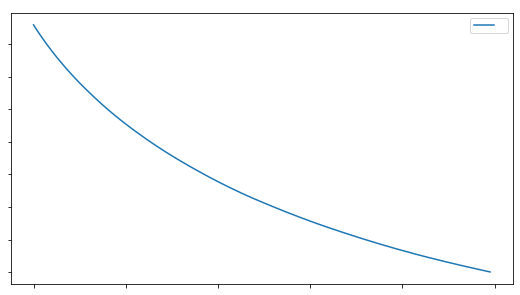

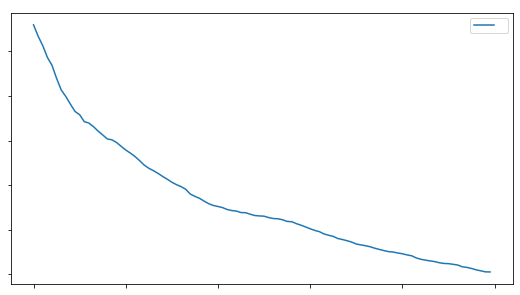

In [211]:
from xgboost.sklearn import XGBClassifier

# Set objective = multi:softprob so that the output contains not only the predicted class (0-15), 
# but also the likelihood for that class to occur.             
xgbc = XGBClassifier(max_depth=25,learning_rate=0.01, random_state=12345, 
                     seed=123, objective='multi:softprob', n_jobs=8)
# #xgbc_cv = GridSearchCV(xgbc, param_grid, cv=5, n_jobs=-1)
xgbc.fit(X_train_os, y_train_os, eval_set=[(X_test_xgb, y_test_xgb)], 
         eval_metric=['mlogloss', 'merror'], early_stopping_rounds=50, verbose=True) #try all parameters
print(xgbc.get_xgb_params()) #print optimum parameters

# preparing evaluation metric plots
results = xgbc.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# xgboost 'mlogloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

# xgboost 'merror' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

In [212]:
## ---------- Model Classification Report ----------
## get predictions and create model quality report
y_pred = xgbc.predict(X_test_xgb)
y_score = xgbc.predict_proba(X_test_xgb) #because our objective is multi:softprob
print(y_pred)
print(y_score[1])

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test_xgb, y_pred))

print('\n-------------------- Key Metrics --------------------')
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test_xgb, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test_xgb, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test_xgb, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test_xgb, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test_xgb, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test_xgb, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test_xgb, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test_xgb, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test_xgb, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test_xgb, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test_xgb, y_pred, average='weighted')))

print('\n--------------- XGBoost - Classification Report ---------------\n')
print(classification_report(y_test_xgb, y_pred))


[0 4 0 ... 0 0 0]
[0.14605513 0.04852463 0.04852404 0.04852857 0.3201557  0.04852405
 0.04852904 0.04852599 0.04852422 0.04852755 0.04852756 0.04852633
 0.04852716]

------------------ Confusion Matrix -----------------

[[72790  4103  3288   347  6133   773    97   228    62     4    37    21
      0]
 [  516   217     0     0     1     0     0     0     0     0     0     0
      0]
 [  179     1   213     0     1     0     0     0     0     0     0     0
      0]
 [  138     0     0     3     0     0     0     0     0     0     0     0
      0]
 [  283     1     0     0   416     1     0     0     0     0     0     0
      0]
 [   36     0     0     0     0    36     0     0     0     0     0     0
      0]
 [    7     0     0     0     0     0     3     0     0     0     0     0
      0]
 [   30     0     0     0     0     0     0    20     0     0     0     0
      0]
 [    2     0     0     0     0     0     0     0     3     0     0     0
      0]
 [    2     0     0     0     0 

Note that based on the 3 key metrics (macro precision, macro F1-score and balanced accuracy), the above XGBOOST Classifiermodel has slightly outperformed the non-tuning Decision Tree Classifier model with the same set of parameters (same max_depth and random_state). Within each target predicted class, the number of positive F1-score is also greater than the non-tuning Decision Tree Classifier model as well. However, the current XGBOOST Classifier model has underperformed the below fine-tuned Decision Tree Classifier model on all 3 key metrics above. 
Hence, we will need to perform hyper-parameter tuning on XGBOOST Classifier to see if it can improve its performance when comparing to the fine-tuned Decision Tree Classifier model.

In [213]:
#Label y-axis with feature names corresponding to the top 5 based on their importance scores.
feat_importance = xgbc.feature_importances_
print(np.argsort(-feat_importance))
print(feat_importance)

print('Top 5 feature importance: \n', 
      list(X_test.columns[np.argsort(-feat_importance)])[0:5])


[ 3  2  1  0  8  5  7  6  9  4 10]
[1.2063413e-01 2.1009904e-01 2.6668406e-01 3.8561541e-01 8.3864952e-04
 2.0278643e-03 1.5309985e-03 1.9807268e-03 9.3810512e-03 1.1928042e-03
 1.5193789e-05]
Top 5 feature importance: 
 ['prev_rgu_data', 'prev_rgu_video', 'prev_rgu_voice', 'prev_number_of_products', 'infin_ind']


We see that 4 out of the 5 top predictors of XGBOOST Classifier are also the same as that of both the non-tuning and fine-tuned Decision Tree Classifier. The only difference is that XGBOOST Classifier has 'infin_ind' as one of its top 5 predictors rather than 'bllng_amt'. Also, the order of importance among the top 5 predictors is also different between XGBOOST Classifier and non-tuning and fine-tuned Decision Tree Classifier.

# CatBoost Classifier for Multi-class classification

In [10]:
#!pip3 install catboost
from catboost import CatBoostClassifier

# Create and train the CatBoostClassifier. 
# Note that the maximum tree depth in Catboost is 16!
cb = CatBoostClassifier(iterations=500, depth=8, learning_rate=0.01, 
                        random_state=12345, thread_count=8, early_stopping_rounds=50,
                        loss_function='MultiClass', verbose=True)

cb.fit(X_train_os, y_train_os)
y_pred = cb.predict(X_test)


print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test, y_pred))

print('\n-------------------- Key Metrics --------------------')
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n---------------Decsion Tree - Classification Report ---------------\n')
print(classification_report(y_test, y_pred))




0:	learn: 2.4660130	total: 10s	remaining: 1h 23m 10s
1:	learn: 2.3783271	total: 17.1s	remaining: 1h 11m
2:	learn: 2.2994026	total: 23.2s	remaining: 1h 4m 5s
3:	learn: 2.2278787	total: 29.3s	remaining: 1h 27s
4:	learn: 2.1622704	total: 35.9s	remaining: 59m 10s
5:	learn: 2.1018129	total: 42.1s	remaining: 57m 48s
6:	learn: 2.0457632	total: 48s	remaining: 56m 17s
7:	learn: 1.9936332	total: 57.2s	remaining: 58m 35s
8:	learn: 1.9447148	total: 1m 6s	remaining: 1h 34s
9:	learn: 1.8988167	total: 1m 14s	remaining: 1h 52s
10:	learn: 1.8554953	total: 1m 24s	remaining: 1h 2m 56s
11:	learn: 1.8146230	total: 1m 34s	remaining: 1h 4m 5s
12:	learn: 1.7759073	total: 1m 48s	remaining: 1h 7m 31s
13:	learn: 1.7390688	total: 1m 58s	remaining: 1h 8m 37s
14:	learn: 1.7039851	total: 2m 10s	remaining: 1h 10m 8s
15:	learn: 1.6706393	total: 2m 23s	remaining: 1h 12m 34s
16:	learn: 1.6387480	total: 2m 33s	remaining: 1h 12m 54s
17:	learn: 1.6081851	total: 2m 43s	remaining: 1h 12m 52s
18:	learn: 1.5788833	total: 2m 49

149:	learn: 0.4638462	total: 20m 30s	remaining: 47m 50s
150:	learn: 0.4614561	total: 20m 35s	remaining: 47m 36s
151:	learn: 0.4589331	total: 20m 41s	remaining: 47m 22s
152:	learn: 0.4564598	total: 20m 46s	remaining: 47m 7s
153:	learn: 0.4541101	total: 20m 53s	remaining: 46m 55s
154:	learn: 0.4516918	total: 21m 4s	remaining: 46m 54s
155:	learn: 0.4492689	total: 21m 15s	remaining: 46m 51s
156:	learn: 0.4469280	total: 21m 22s	remaining: 46m 42s
157:	learn: 0.4446637	total: 21m 31s	remaining: 46m 36s
158:	learn: 0.4424168	total: 21m 42s	remaining: 46m 33s
159:	learn: 0.4402713	total: 21m 58s	remaining: 46m 41s
160:	learn: 0.4380185	total: 22m 9s	remaining: 46m 38s
161:	learn: 0.4358648	total: 22m 18s	remaining: 46m 33s
162:	learn: 0.4337180	total: 22m 26s	remaining: 46m 23s
163:	learn: 0.4316150	total: 22m 33s	remaining: 46m 13s
164:	learn: 0.4294799	total: 22m 40s	remaining: 46m 2s
165:	learn: 0.4273662	total: 22m 46s	remaining: 45m 49s
166:	learn: 0.4252864	total: 22m 53s	remaining: 45m 

297:	learn: 0.2768357	total: 41m 38s	remaining: 28m 13s
298:	learn: 0.2762871	total: 41m 46s	remaining: 28m 5s
299:	learn: 0.2757450	total: 41m 53s	remaining: 27m 55s
300:	learn: 0.2751996	total: 42m	remaining: 27m 46s
301:	learn: 0.2746493	total: 42m 9s	remaining: 27m 38s
302:	learn: 0.2741119	total: 42m 18s	remaining: 27m 30s
303:	learn: 0.2736109	total: 42m 26s	remaining: 27m 21s
304:	learn: 0.2731186	total: 42m 33s	remaining: 27m 12s
305:	learn: 0.2724920	total: 42m 41s	remaining: 27m 3s
306:	learn: 0.2720005	total: 42m 49s	remaining: 26m 55s
307:	learn: 0.2715129	total: 43m	remaining: 26m 48s
308:	learn: 0.2710993	total: 43m 9s	remaining: 26m 40s
309:	learn: 0.2706009	total: 43m 19s	remaining: 26m 33s
310:	learn: 0.2700901	total: 43m 28s	remaining: 26m 25s
311:	learn: 0.2696013	total: 43m 35s	remaining: 26m 16s
312:	learn: 0.2691322	total: 43m 43s	remaining: 26m 7s
313:	learn: 0.2686532	total: 43m 54s	remaining: 26m
314:	learn: 0.2681518	total: 44m 2s	remaining: 25m 51s
315:	learn

445:	learn: 0.2284051	total: 1h 4m	remaining: 7m 44s
446:	learn: 0.2281818	total: 1h 4m 10s	remaining: 7m 36s
447:	learn: 0.2279654	total: 1h 4m 21s	remaining: 7m 28s
448:	learn: 0.2277829	total: 1h 4m 30s	remaining: 7m 19s
449:	learn: 0.2276190	total: 1h 4m 45s	remaining: 7m 11s
450:	learn: 0.2274217	total: 1h 4m 56s	remaining: 7m 3s
451:	learn: 0.2272584	total: 1h 5m 7s	remaining: 6m 54s
452:	learn: 0.2270971	total: 1h 5m 16s	remaining: 6m 46s
453:	learn: 0.2269430	total: 1h 5m 25s	remaining: 6m 37s
454:	learn: 0.2267038	total: 1h 5m 33s	remaining: 6m 29s
455:	learn: 0.2264945	total: 1h 5m 46s	remaining: 6m 20s
456:	learn: 0.2263491	total: 1h 5m 59s	remaining: 6m 12s
457:	learn: 0.2261489	total: 1h 6m 8s	remaining: 6m 3s
458:	learn: 0.2259529	total: 1h 6m 19s	remaining: 5m 55s
459:	learn: 0.2258929	total: 1h 6m 29s	remaining: 5m 46s
460:	learn: 0.2257450	total: 1h 6m 36s	remaining: 5m 38s
461:	learn: 0.2254983	total: 1h 6m 45s	remaining: 5m 29s
462:	learn: 0.2252570	total: 1h 6m 52s	

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Weighted Precision: 0.97
Weighted Recall: 0.15
Weighted F1-score: 0.22

---------------Decsion Tree - Classification Report ---------------

              precision    recall  f1-score   support

           0       1.00      0.13      0.22     87883
           1       0.03      0.97      0.06       734
           2       0.03      0.99      0.06       394
           3       0.01      0.91      0.01       141
           4       0.05      0.96      0.10       701
           5       0.02      0.97      0.04        72
           6       0.01      1.00      0.02        10
           7       0.05      0.92      0.09        50
           9       0.01      0.60      0.02         5
          10       0.01      0.50      0.02         2
          11       0.02      1.00      0.04         2
          12       0.11      1.00      0.21         4
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1

    accuracy                           0.15    

Looking across the three key metrics (macro-averaged Precision & F1-score, balanced accuracy) above, we see that CatBoost classifier slightly underperforms the no-tuning Decision Tree Classifier, but severely underperforms the fine-tuned Decision Tree classifier. Its balanced accuracy is also below that of the fine-tuned one (0.71 vs 0.74) Hence, we won't select this model either for hyper-parameter tuning.

# Hyper-parameter tuning for XGBOOST Classifier - 1st best model so far (based on 3 metrics: macro-average Precision & F1-score, and balanced accuracy)

In [227]:
# We test the model with respect to max_depth parameter from 25 to 35, 
## as cross-validation took insanely long time on my local laptop, 
## even when training in parallel with the parameter 'n_jobs=8'

for max_depth in range(25,36):
    xgbc = XGBClassifier(max_depth=max_depth,learning_rate=0.01, random_state=12345, 
                         seed=123, objective='multi:softprob', n_jobs=8)
    xgbc.fit(X_train_os, y_train_os, eval_set=[(X_test_xgb, y_test_xgb)], 
             eval_metric=['mlogloss', 'merror'], early_stopping_rounds=50, verbose=True) #try all parameters
    ## ---------- Model Classification Report ----------
    ## get predictions and create model quality report
    y_pred = xgbc.predict(X_test_xgb)
    y_score = xgbc.predict_proba(X_test_xgb) #because our objective is multi:softprob

    print('\n------------------ Confusion Matrix -----------------\n')
    print(confusion_matrix(y_test_xgb, y_pred))

    print('\n-------------------- Key Metrics --------------------')
    print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test_xgb, y_pred)))
    print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test_xgb, y_pred)))

    print('Micro Precision: {:.2f}'.format(precision_score(y_test_xgb, y_pred, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test_xgb, y_pred, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test_xgb, y_pred, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(y_test_xgb, y_pred, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test_xgb, y_pred, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test_xgb, y_pred, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test_xgb, y_pred, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test_xgb, y_pred, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test_xgb, y_pred, average='weighted')))

    print('\n--------------- XGBoost - Classification Report ---------------\n')
    print(classification_report(y_test_xgb, y_pred))




[0]	validation_0-mlogloss:2.51899	validation_0-merror:0.29194
[1]	validation_0-mlogloss:2.47544	validation_0-merror:0.28684
[2]	validation_0-mlogloss:2.43416	validation_0-merror:0.28261
[3]	validation_0-mlogloss:2.39476	validation_0-merror:0.27736
[4]	validation_0-mlogloss:2.35735	validation_0-merror:0.27380
[5]	validation_0-mlogloss:2.32149	validation_0-merror:0.26794
[6]	validation_0-mlogloss:2.28721	validation_0-merror:0.26274
[7]	validation_0-mlogloss:2.25413	validation_0-merror:0.25980
[8]	validation_0-mlogloss:2.22224	validation_0-merror:0.25634
[9]	validation_0-mlogloss:2.19156	validation_0-merror:0.25308
[10]	validation_0-mlogloss:2.16205	validation_0-merror:0.25162
[11]	validation_0-mlogloss:2.13354	validation_0-merror:0.24850
[12]	validation_0-mlogloss:2.10604	validation_0-merror:0.24787
[13]	validation_0-mlogloss:2.07905	validation_0-merror:0.24626
[14]	validation_0-mlogloss:2.05251	validation_0-merror:0.24427
[15]	validation_0-mlogloss:2.02686	validation_0-merror:0.24255
[1

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Weighted Precision: 0.96
Weighted Recall: 0.82
Weighted F1-score: 0.88

--------------- XGBoost - Classification Report ---------------



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      0.83      0.90     87883
           1       0.05      0.30      0.09       734
           2       0.06      0.54      0.11       394
           3       0.01      0.02      0.01       141
           4       0.06      0.59      0.11       701
           5       0.04      0.50      0.08        72
           6       0.03      0.30      0.05        10
           7       0.08      0.40      0.13        50
           9       0.05      0.60      0.09         5
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.09      0.50      0.15         4
          14       0.00      0.00      0.00         1

    accuracy                           0.82     89999
   macro avg       0.11      0.35      0.13     89999
weighted avg       0.96      0.82      0.88     89999

[0]	validation_0-mlogloss:2.51803	validation_0-merror:0.28919
[1]	validation_0-

Balanced Accuracy: 0.34

Micro Precision: 0.83
Micro Recall: 0.83
Micro F1-score: 0.83

Macro Precision: 0.11
Macro Recall: 0.34
Macro F1-score: 0.13

Weighted Precision: 0.96
Weighted Recall: 0.83
Weighted F1-score: 0.89

--------------- XGBoost - Classification Report ---------------

              precision    recall  f1-score   support

           0       0.98      0.84      0.91     87883
           1       0.05      0.28      0.09       734
           2       0.06      0.53      0.11       394
           3       0.01      0.01      0.01       141
           4       0.07      0.57      0.12       701
           5       0.04      0.46      0.08        72
           6       0.03      0.30      0.05        10
           7       0.08      0.38      0.13        50
           9       0.05      0.60      0.09         5
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.09      0.50      0.15         4
         

Balanced Accuracy: 0.33

Micro Precision: 0.84
Micro Recall: 0.84
Micro F1-score: 0.84

Macro Precision: 0.11
Macro Recall: 0.33
Macro F1-score: 0.13

Weighted Precision: 0.96
Weighted Recall: 0.84
Weighted F1-score: 0.89

--------------- XGBoost - Classification Report ---------------

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     87883
           1       0.05      0.25      0.08       734
           2       0.06      0.52      0.11       394
           3       0.00      0.01      0.00       141
           4       0.07      0.52      0.12       701
           5       0.05      0.44      0.09        72
           6       0.03      0.30      0.05        10
           7       0.08      0.36      0.13        50
           9       0.05      0.60      0.09         5
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.09      0.50      0.15         4
         

Balanced Accuracy: 0.33

Micro Precision: 0.85
Micro Recall: 0.85
Micro F1-score: 0.85

Macro Precision: 0.11
Macro Recall: 0.33
Macro F1-score: 0.13

Weighted Precision: 0.96
Weighted Recall: 0.85
Weighted F1-score: 0.90

--------------- XGBoost - Classification Report ---------------

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     87883
           1       0.05      0.22      0.08       734
           2       0.06      0.51      0.11       394
           3       0.01      0.01      0.01       141
           4       0.07      0.49      0.12       701
           5       0.05      0.39      0.08        72
           6       0.03      0.30      0.05        10
           7       0.08      0.36      0.13        50
           9       0.05      0.60      0.09         5
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.09      0.50      0.15         4
         

Balanced Accuracy: 0.32

Micro Precision: 0.85
Micro Recall: 0.85
Micro F1-score: 0.85

Macro Precision: 0.11
Macro Recall: 0.32
Macro F1-score: 0.13

Weighted Precision: 0.96
Weighted Recall: 0.85
Weighted F1-score: 0.90

--------------- XGBoost - Classification Report ---------------

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     87883
           1       0.05      0.21      0.09       734
           2       0.06      0.51      0.11       394
           3       0.00      0.01      0.01       141
           4       0.07      0.48      0.12       701
           5       0.05      0.35      0.09        72
           6       0.03      0.30      0.06        10
           7       0.08      0.36      0.13        50
           9       0.05      0.60      0.09         5
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.09      0.50      0.15         4
         

Balanced Accuracy: 0.31

Micro Precision: 0.86
Micro Recall: 0.86
Micro F1-score: 0.86

Macro Precision: 0.11
Macro Recall: 0.31
Macro F1-score: 0.13

Weighted Precision: 0.96
Weighted Recall: 0.86
Weighted F1-score: 0.90

--------------- XGBoost - Classification Report ---------------

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     87883
           1       0.05      0.19      0.08       734
           2       0.06      0.50      0.11       394
           3       0.00      0.00      0.00       141
           4       0.07      0.46      0.12       701
           5       0.05      0.26      0.08        72
           6       0.03      0.30      0.06        10
           7       0.08      0.36      0.13        50
           9       0.05      0.60      0.09         5
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.09      0.50      0.15         4
         

Balanced Accuracy: 0.31

Micro Precision: 0.87
Micro Recall: 0.87
Micro F1-score: 0.87

Macro Precision: 0.11
Macro Recall: 0.31
Macro F1-score: 0.13

Weighted Precision: 0.96
Weighted Recall: 0.87
Weighted F1-score: 0.91

--------------- XGBoost - Classification Report ---------------

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     87883
           1       0.05      0.18      0.08       734
           2       0.06      0.50      0.11       394
           3       0.00      0.00      0.00       141
           4       0.07      0.44      0.12       701
           5       0.05      0.24      0.08        72
           6       0.03      0.30      0.06        10
           7       0.08      0.36      0.13        50
           9       0.05      0.60      0.09         5
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.09      0.50      0.15         4
         

KeyboardInterrupt: 

Based on our 10-hour runtime for tuning the key parameter 'max_depth' while keeping all other parameters cosntant (it took more than 1.5 days *without* finishing when doing hyper-parameter with GridSearchCV() on several parameters like max_depth and learning_rate at once), we see that as max_depth increases, the macro-average F1-score and Precision is not really improved much if at all (they even deteriorate after max_depth >= 26). Hence, setting **max_depth=25** gives us the optimal result for XGBoost Classifier on 3 keys metrics: macro-average Precision, macro-average F1-score, and balanced accuracy. However, this model underperformed a fine-tuned Decision Tree classifier (shown below) on those 3 key metrics, so we would not select this XGBoost Classifier model.

# Hyper-parameter tuning for DecisionTreeClassifier - 2nd best model (based on 3 metrics: macro-average Precision & F1-score, and balanced accuracy)

In [97]:
# These parameters will be used in Gridsearch and will be found optimum parameters
param_grid = {'max_features': ['auto', 'sqrt', 'log2', len(X_train_os.columns)],
              'max_depth' : [10, 20, 25, 30, 40, 50],
              'criterion' :['gini', 'entropy'],
              'random_state':[12345],
              'ccp_alpha': [0.001, 0.01, 0.1]
             }

dtc = DecisionTreeClassifier()

#5-fold cross validation
dtc_cv = GridSearchCV(dtc, param_grid, cv=5, n_jobs=-1, verbose=5)
dtc_cv.fit(X_train_os, y_train_os) #try all parameters
dtc_cv.best_params_ #print optimum parameters


Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 29.1min finished


{'ccp_alpha': 0.001,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 11,
 'random_state': 12345}

In [214]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score

dtc_best = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                                  max_depth=20, max_features=11, random_state=12345)
dtc_best.fit(X_train_os, y_train_os)
y_pred = dtc_best.predict(X_test)


print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test, y_pred))

print('\n-------------------- Key Metrics --------------------')
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n---------------Decsion Tree - Classification Report ---------------\n')
print(classification_report(y_test, y_pred))




------------------ Confusion Matrix -----------------

[[ 2826 23638 12701 29145 13030  4127   893  1160   220    18    91    34
      0     0]
 [    0   708     7     8     0    11     0     0     0     0     0     0
      0     0]
 [    0     3   388     1     0     1     0     1     0     0     0     0
      0     0]
 [    3     3     0   133     0     2     0     0     0     0     0     0
      0     0]
 [    0    13     3     0   670    14     0     0     0     1     0     0
      0     0]
 [    0     0     0     1     0    71     0     0     0     0     0     0
      0     0]
 [    0     0     0     0     0     0    10     0     0     0     0     0
      0     0]
 [    0     0     0     1     0     2     0    47     0     0     0     0
      0     0]
 [    0     0     1     0     0     1     0     0     3     0     0     0
      0     0]
 [    0     0     2     0     0     0     0     0     0     0     0     0
      0     0]
 [    0     0     0     0     0     0     0     0     

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Weighted Recall: 0.05
Weighted F1-score: 0.06

---------------Decsion Tree - Classification Report ---------------

              precision    recall  f1-score   support

           0       1.00      0.03      0.06     87883
           1       0.03      0.96      0.06       734
           2       0.03      0.98      0.06       394
           3       0.00      0.94      0.01       141
           4       0.05      0.96      0.09       701
           5       0.02      0.99      0.03        72
           6       0.01      1.00      0.02        10
           7       0.04      0.94      0.07        50
           9       0.01      0.60      0.03         5
          10       0.00      0.00      0.00         2
          11       0.02      1.00      0.04         2
          12       0.11      1.00      0.19         4
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1

    accuracy                           0.05     90000
   macro avg      

Based on the classification report, we see that the macro average of Precision and F1-score improved pretty substantially compared to the non-tuning DecisionTreeClassifier() above (17% and 12% vs 8% and 9%, respectively).
Its balanced accuracy also jumped significantly to 74% as opposed to 24% of the non-tuning Decision Tree Classifier model. As macro-average Precision and F1-score are more important in our problem context as opposed to the overall accuracy (because we value accuracy of our classifier towards minority classes, rather than class 0, which is a majority class representing NO TARGET), we would stick with this fine-tuned DECISION TREE model. 

In [224]:
feat_importance = dtc_best.tree_.compute_feature_importances(normalize=False)

# Convert the list to a numpy array.
array_feat = np.array(feat_importance)
print(array_feat)

# Get the indices of the top 5 largest elements.
top5_largest_indices = np.argsort(-array_feat)[0:5]

for i in top5_largest_indices:
    print(list(top5_largest_indices).index(i),"-th", "most important feature impacting this prediction = " + str(X_test.columns[i]))

Index(['prev_number_of_products', 'prev_rgu_voice', 'prev_rgu_video',
       'prev_rgu_data', 'offer_months_duration', 'PREMIUM', 'data_total_gb',
       'bllng_amt', 'infin_ind', 'tellop_ind', 'delinquent_90_balance_amt'],
      dtype='object')
[1.06550575 0.83944658 0.5974221  0.63355761 0.02082425 0.01355695
 0.0349922  0.15431256 0.01968153 0.00933604 0.        ]
0 -th most important feature impacting this prediction = prev_number_of_products
1 -th most important feature impacting this prediction = prev_rgu_voice
2 -th most important feature impacting this prediction = prev_rgu_data
3 -th most important feature impacting this prediction = prev_rgu_video
4 -th most important feature impacting this prediction = bllng_amt


The top 5 predictors for this fine-tuned DECISION TREE CLASSIFIER still remains the same as the no-tuning DECISION TREE CLASSIFIER, but the order of importance has changed pretty significantly (e.g. 'prev_rgu_video' used to be the 2nd most important predictor, now it became 4th most important).

# Sample Output - DECISION TREE CLASSIFIER

In [96]:
client_data = [
     [2,1,0,1,0,1,1.5,0,2,0,144]
]

x_sample = pd.DataFrame(client_data, columns=['prev_number_of_products', 'prev_rgu_voice', 
                                              'prev_rgu_video', 'prev_rgu_video', 
                                              'offer_months_duration','PREMIUM', 
                                              'data_total_gb','bllng_amt','infin_ind',
                                              'tellop_ind', 'delinquent_90_balance_amt'])

label_decoding = ['VIDEO/DATA','VIDEO ONLY','VIDEO/DATA/VOICE', 'DATA ONLY', 'DATA/VOICE', 'VIDEO/DATA/HOME', 
                  'VIDEO/VOICE', 'VIDEO/DATA/VOICE/HOME', 'VOICE ONLY','HOME ONLY', 'DATA/HOME', 
                  'DATA/VOICE/HOME', 'VOICE/HOME', 'VIDEO/VOICE/HOME', 'VIDEO/HOME']

sample_pred = dtc_best.predict(x_sample)[0]

if sample_pred > 0:
    print('Our Decision Tree classidication model suggests an input customer needs to be targeted with product: ', 
          label_decoding[sample_pred-1])
    print('Please check customer`s delinquency balance during the last 90 days before making decision.')
else:
    print('Do not predict the input customer with data: ', data)

Our Decision Tree classidication model suggests an input customer needs to be targeted with product:  DATA/VOICE
Please check customer`s delinquency balance during the last 90 days before making decision.


# CONCLUSION 

Finally, given the time constraint, currently the selected **DECISION TREE** classification model outputs a class between 0 and 15 (where 0 = NO TARGET, while 1-14 = TARGET with a particular product), when being fed the input with 11 features: 'prev_number_of_products', 'prev_rgu_voice', 'prev_rgu_video', 'prev_rgu_data', 'offer_months_duration', 'PREMIUM, 'data_total_gb', 'bllng_amt', 'infin_ind', 'tellop_ind', 'delinquent_90_balance_amt'. 

The final interpretable output is the class from 0 to 15 and then the probability of that class. The analyst should use such probability as reference point in his decision making process while considering a variety of other business factors such as whether the customer is an existing vs new one, the pricing point of the product suggested by the model for the target customer, and how much time consuming/costly it is for the analyst to target such customer if he already had experience dealing with the same customer in the past.  Do NOT make the decision purely based on the model's output! 

Since our dataset is highly imbalanced towards a particular class 0 (i.e., NO TARGET), besdies considering the metrics Overall Accuracy, macro-averaged accuracy and weighted average accuracy and weighted average F1-score are also taken into consideration when selecting the best model among all the classification models tested above. In that regard, the **Decision Tree** model has performed the best in terms of these metrics. The top 5 predictive features in our Decision Tree Classification model are: **'prev_rgu_video', 'bllng_amt', 'prev_rgu_data', prev_number_of_products, 'prev_rgu_voice.'** 

I also applied **GridSearchCV()** to do hyper-parameter tuning for our selected Decision Tree Classification model, which shows a significant lift in its weighted average and macro-averaged precision and F1-score. These two metrics are important because our dataset is a highly imbalanced one skewed towards class 0, which is not quite important to our analyst UNLESS the cost for reaching out to a particular client is high, in terms of time and monetary.

As this selected Decision Tree Classifier model still suffers from overfitting based on 3 metrics: "Macro Precision", "Macro F1-score" and "Overall Accuracy", it still predicts most of the customers as **non-target** (i.e., this is the majority class 0, as our dataset is highly imbalanced and skewed towards this particular class). Those that are possibly targetted belong to **class 1, 3-6**, which corresponds to **'VIDEO ONLY', 'DATA ONLY', 'DATA/VOICE', 'VIDEO/DATA/HOME'**, and **'VIDEO/VOICE'** with no deliquencies in the past 90-145 days. Most of these suggested products collide with the results obtained from the EDA above, except the 'VIDEO/DATA/HOME.' Furthermore, if targetting the customer who has no service with COMCAST in the previous month, the analyst should first check if the reason was because the customer still owed money to COMCAST (i.e., whether they have 'delinquent_90_balance_amt > 0'). If yes, avoid targetting that customer! If not, I recommend the analyst to try their best to cross sell VIDEO-related service to that customer (particularly 'VIDEO ONLY' as it is the easiest cross selling opportunity), because selling VIDEO-related service allows the analyst to have upsell opportunity with PREMIUM channel as well. Next best option is cross sell DATA-related service. Depending on the seasonlity (e.g. selling to new customers in the Summer 2024 means great opportunity to sell VIDEO-related service due to special live events such as Olympic 2024). For existing customer with data on their previous month's service, cross selling them with a new service in the order of 'VIDEO' -> 'DATA' -> 'VOICE' -> 'HOME' would be the correct sequential step to take.

Finally, to **measure the effectiveness of my solution**, the analyst can randomly pick a number of sample customers that are least expensive to reach out (and perhaps those he thinks are easy to speak to). Then he can put their corresponding attitudes/features into our models, see if any customers were returned with class # 0 and then reaching out to those customers and pitched to them. Furthermore, if the analyst has a more recent dataset on customers whom he has reached out successfully and which cross-sell opportunity was taken, he can just take a sample from that dataset (say, 100 customers), and input them into our model and compare the model's prediction output with the actual result.